Using environment: telco_customer_churn

1.1 Library Setup

In [241]:
# Base libraries
import os
import time
import datetime
import json

# Scientific libraries
import numpy as np
import pandas as pd

# from sklearn import svm # or any other function

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
# import missingno as msno  # Visualize missing values
# most definitely plotly

# # Helper libraries
# from tqdm.notebook import tqdm, trange
# from colorama import Fore, Back, Style
# import warnings
# warnings.filterwarnings('ignore')

# # Visual setup
# plt.style.use('fivethirtyeight')   # alternatives below
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
# plt.rc('xtick', labelsize=11)
# plt.rc('ytick', labelsize=11)
# custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
# sns.set_palette(custom_colors)
# %config InlineBackend.figure_format = 'retina'
# %config Completer.use_jedi = False

# # Pandas options
# pd.set_option('max_colwidth', 40)
# pd.options.display.max_columns = None  # Possible to limit
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

# # Seed value for numpy.random
# np.random.seed(42)

In [242]:
customer_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [243]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [244]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [245]:
# For Senior Citizem Column Make 0 = No, 1 = Yes. Later we will convert this back to Numeric but for creating visuals we are doing this.
customer_df['SeniorCitizen'] = customer_df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Drop the customerID column
customer_df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to Float
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors='coerce')

In [246]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [247]:
# First, let's identify the object columns with 2 to 4 unique values for visualization
selected_object_cols = [col for col in customer_df.columns if customer_df[col].nunique() >= 2 and customer_df[col].nunique() <= 4 and customer_df[col].dtype == 'object']

# Since 'Churn' is our target variable, we remove it from the feature list
selected_object_cols = [col for col in selected_object_cols if col != 'Churn']

V1

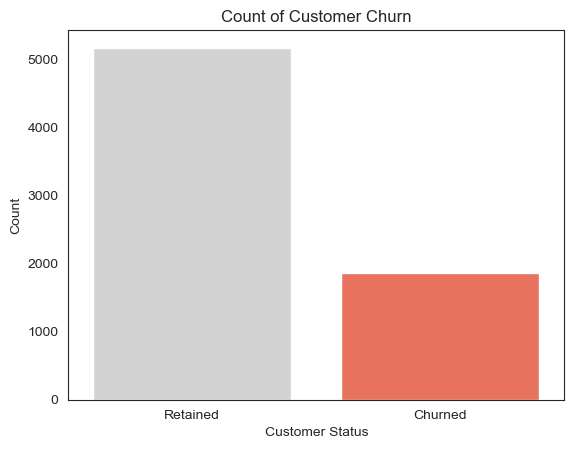

In [248]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Assuming 'customer_df_one_hot_encoded' is your DataFrame and 'Churn' is the column with your target variable
churn_counts = customer_df['Churn'].value_counts()

# Define your custom color palette
custom_palette = ['#D3D3D3', '#FF6347']

# Create a bar plot with the custom palette
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=custom_palette)

# Set the labels and title
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Count of Customer Churn')

# Rename the x-axis ticks for clarity
plt.xticks([0, 1], ['Retained', 'Churned'])

# Show the plot
plt.show()



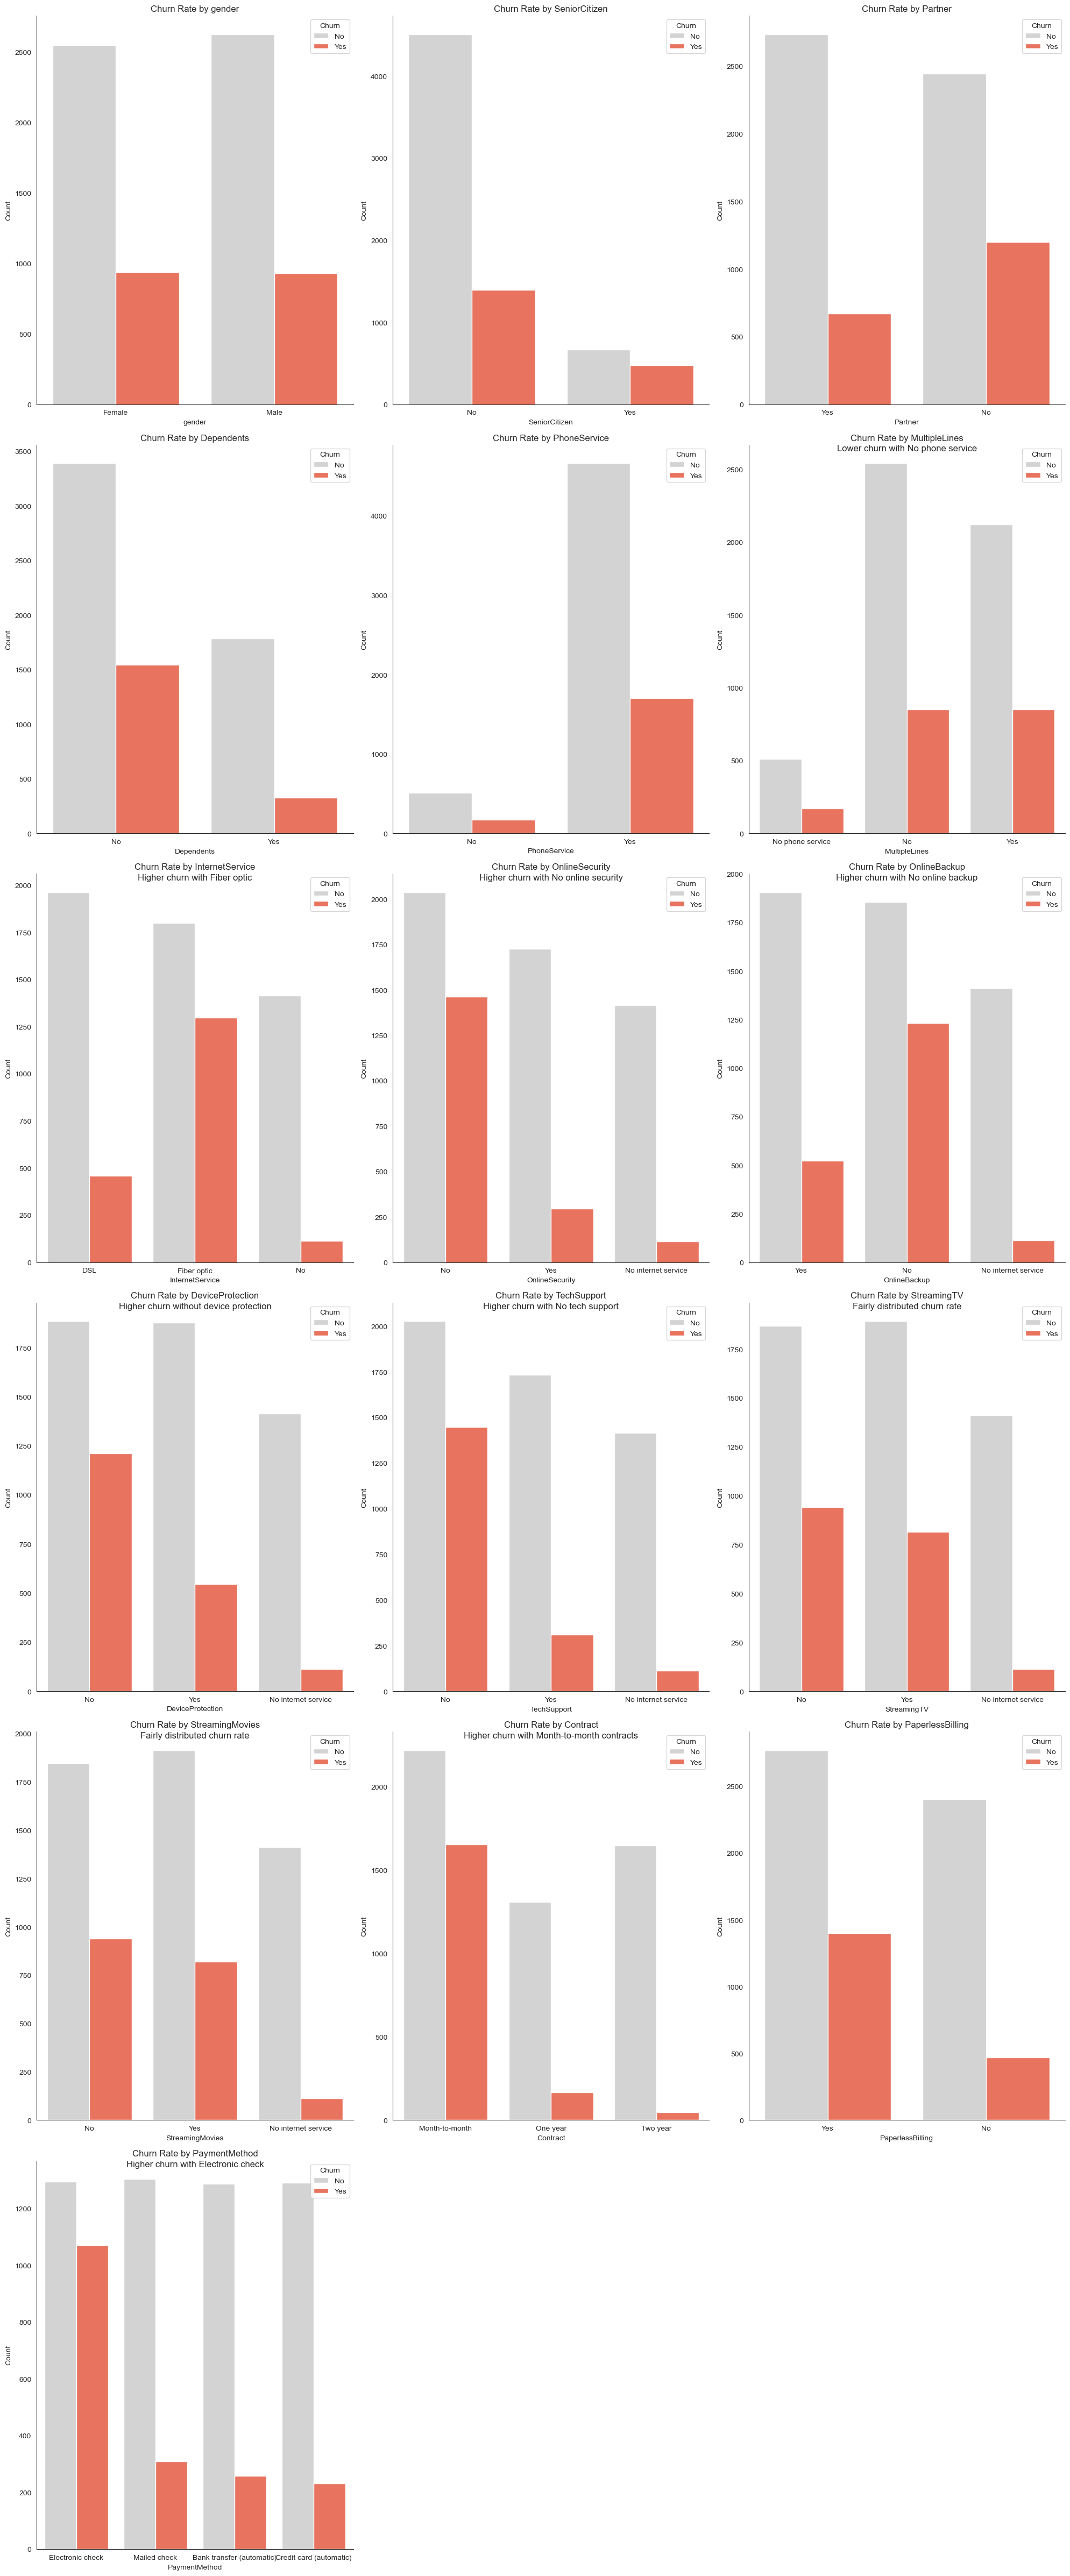

In [249]:
# Calculate the number of subplots needed
num_plots = len(selected_object_cols)

# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(num_plots / 3))

# Generate visuals with insights written on them
plt.figure(figsize=(20, num_rows * 8))
for i, col in enumerate(selected_object_cols, 1):
    ax = plt.subplot(num_rows, 3, i)
    plt.subplot(num_rows, 3, i)
    sns.countplot(x=col, hue='Churn', data=customer_df, palette=['#D3D3D3', '#FF6347'])
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Removing the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    
    # Only show the bottom spine
    ax.spines['bottom'].set_visible(True)

    # Add insights as text annotations
    insights = {
        'MultipleLines': 'Lower churn with No phone service',
        'InternetService': 'Higher churn with Fiber optic',
        'OnlineSecurity': 'Higher churn with No online security',
        'OnlineBackup': 'Higher churn with No online backup',
        'DeviceProtection': 'Higher churn without device protection',
        'TechSupport': 'Higher churn with No tech support',
        'StreamingTV': 'Fairly distributed churn rate',
        'StreamingMovies': 'Fairly distributed churn rate',
        'Contract': 'Higher churn with Month-to-month contracts',
        'PaymentMethod': 'Higher churn with Electronic check'
    }
    
    # plt.annotate(insights.get(col, ''), xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, ha='center')
    plt.text(0.5, 0.98, insights.get(col, ''), transform=plt.gca().transAxes, fontsize=12, ha='center', va='bottom')
    # churn_data_percentage.plot(kind='barh', stacked=True, ax=ax, legend=False, color=['#D3D3D3', '#FF6347'])  # Grey for 'Retained', Lighter Red for 'Churned'


plt.tight_layout()
plt.show()


Creating Categorical Plots

In [250]:
# List the names of all columns that are objects
object_cols = [col for col in customer_df.columns if customer_df[col].dtype == 'object']
print(object_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


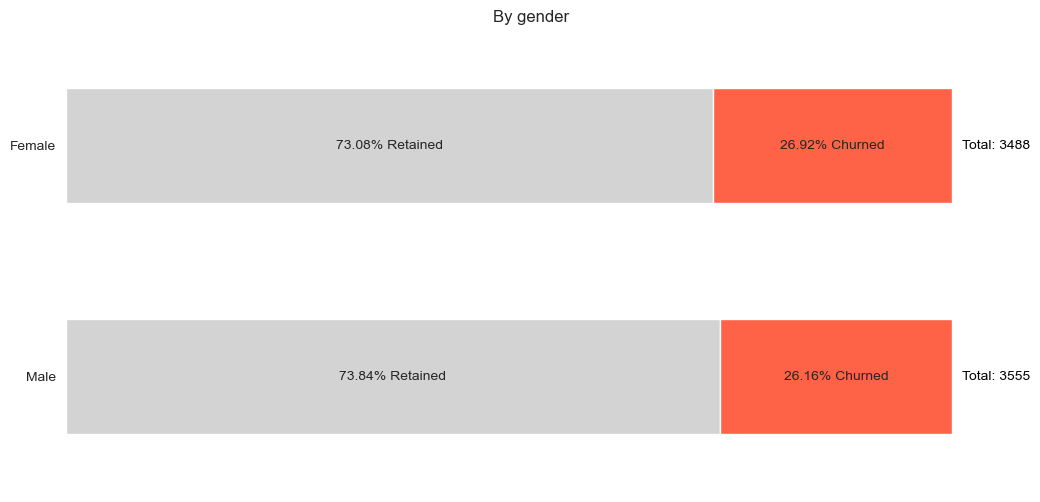

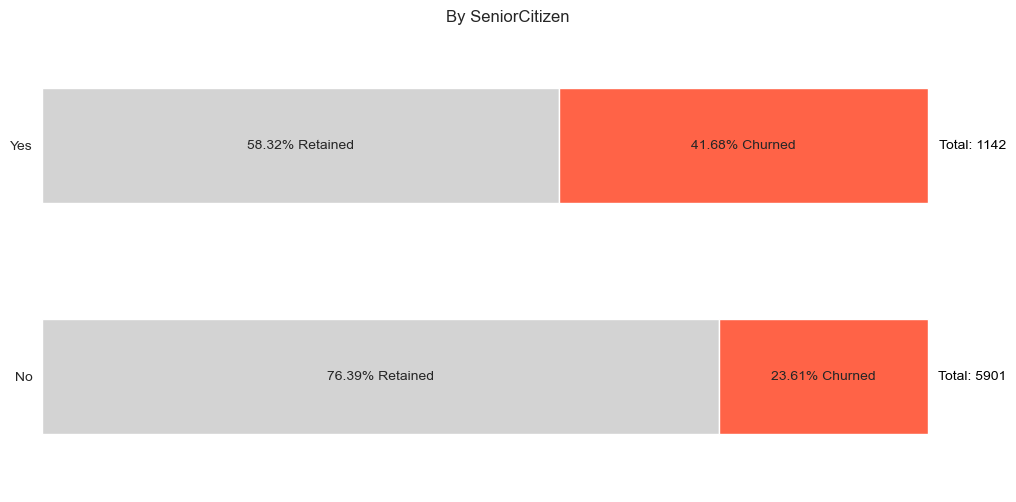

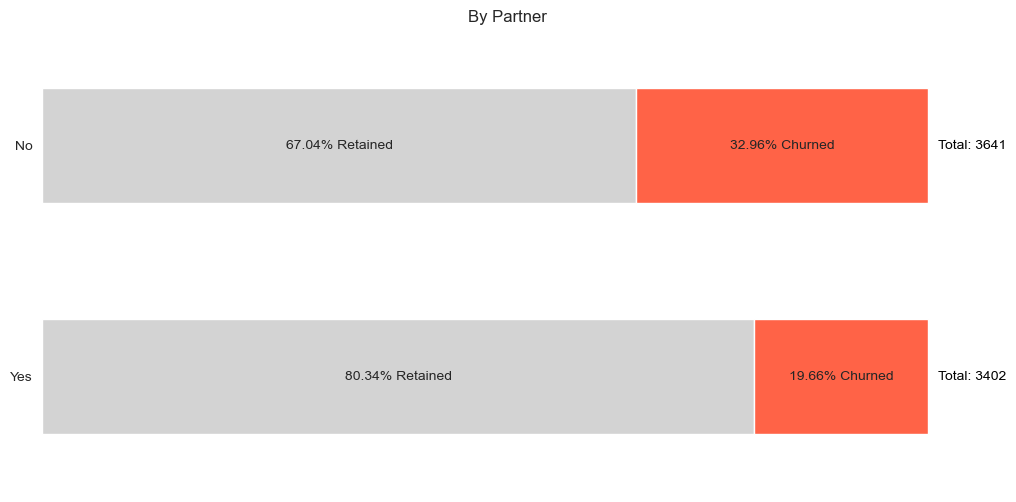

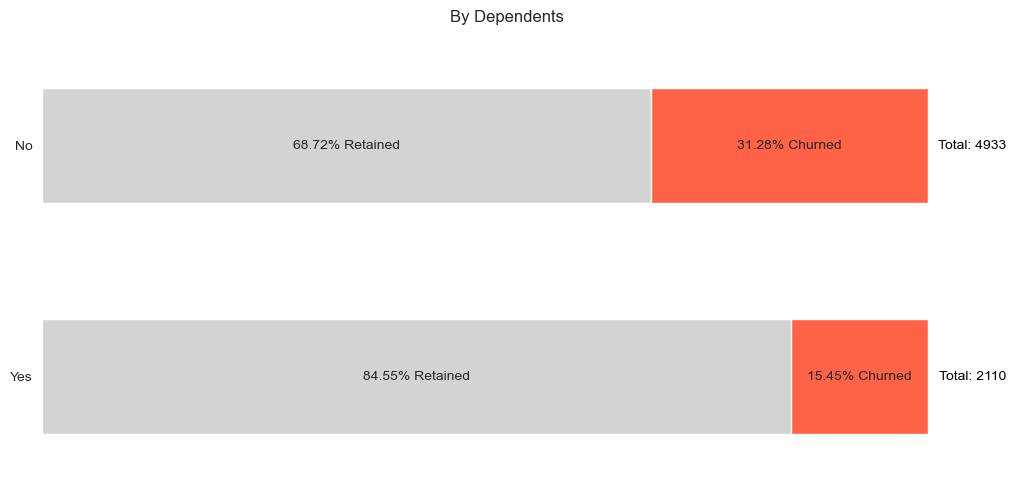

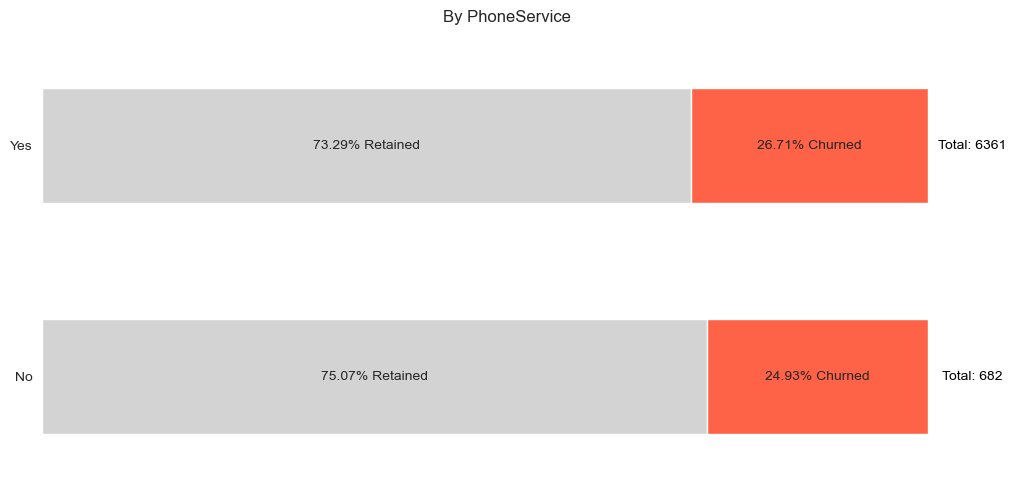

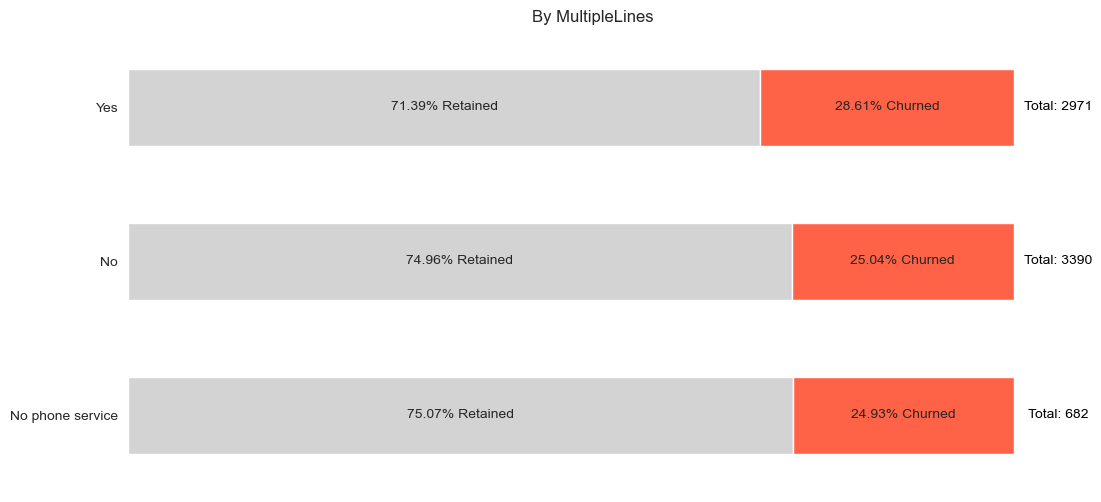

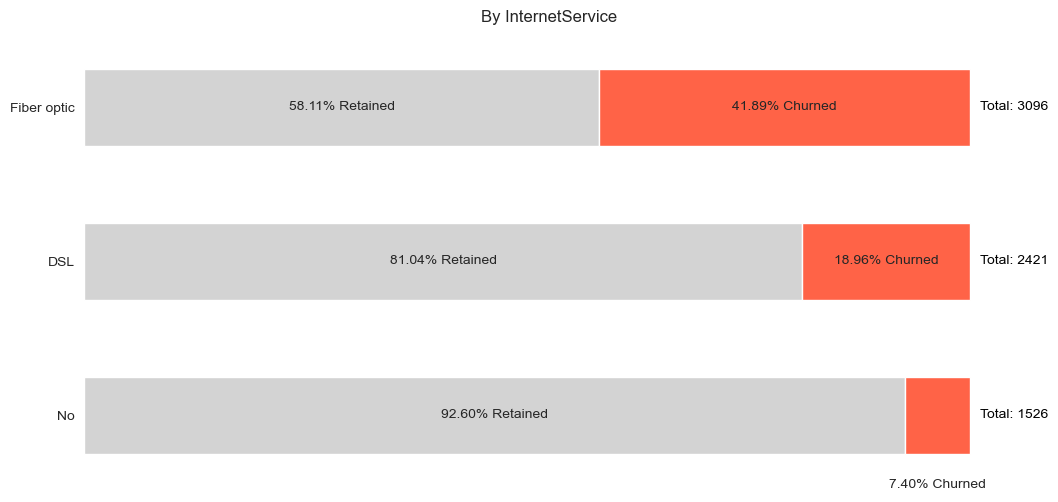

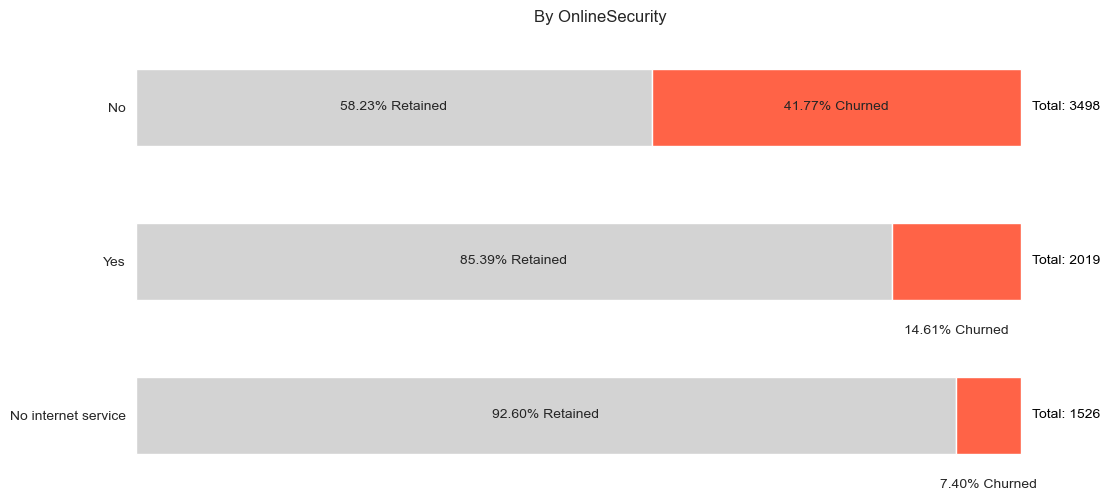

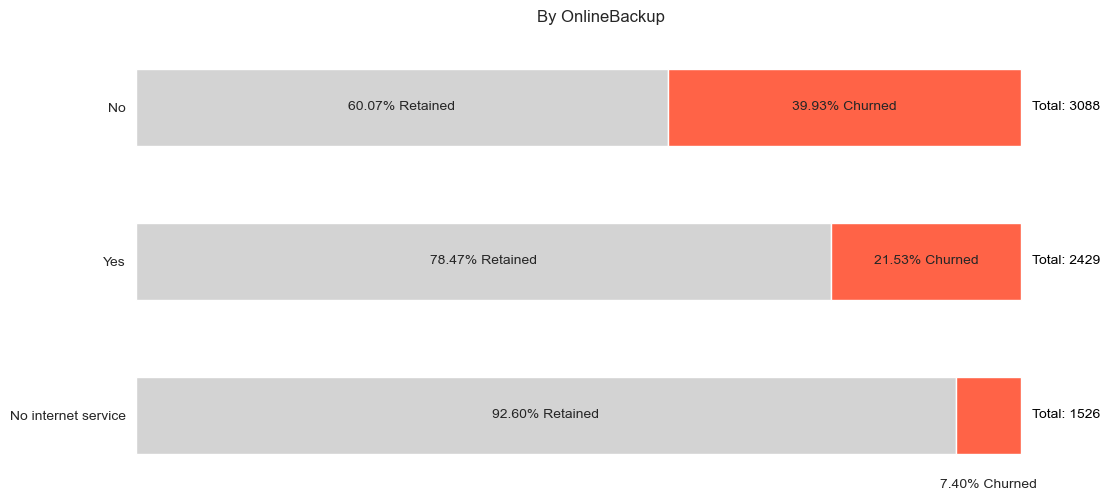

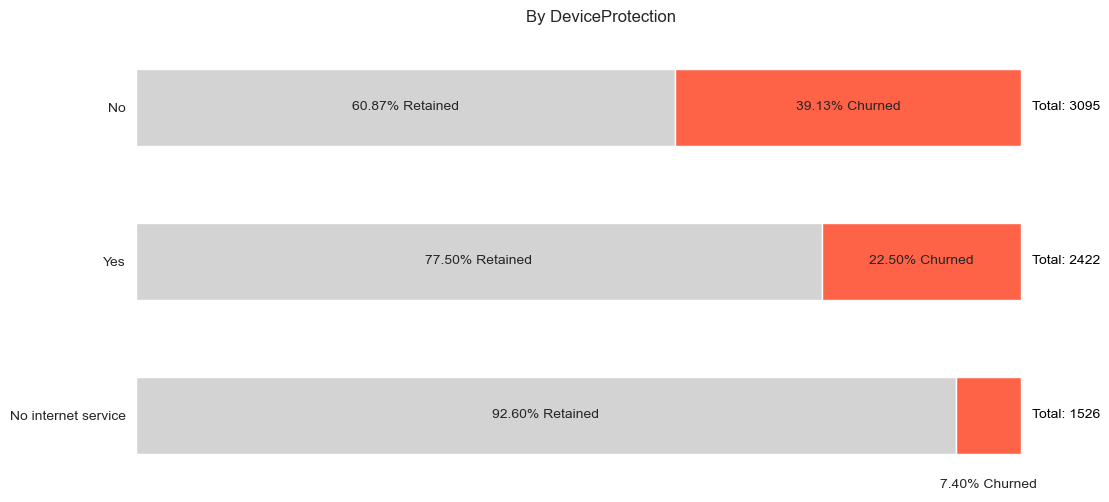

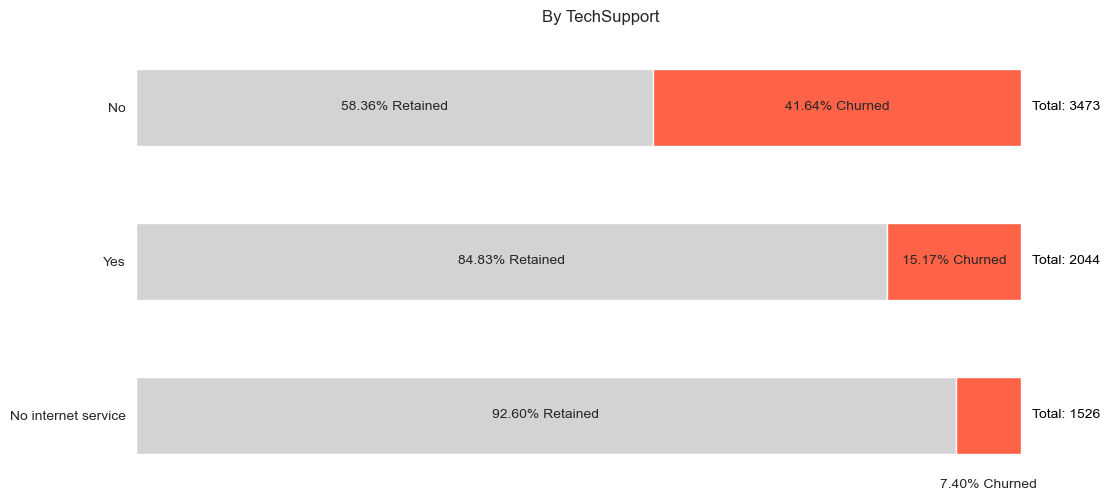

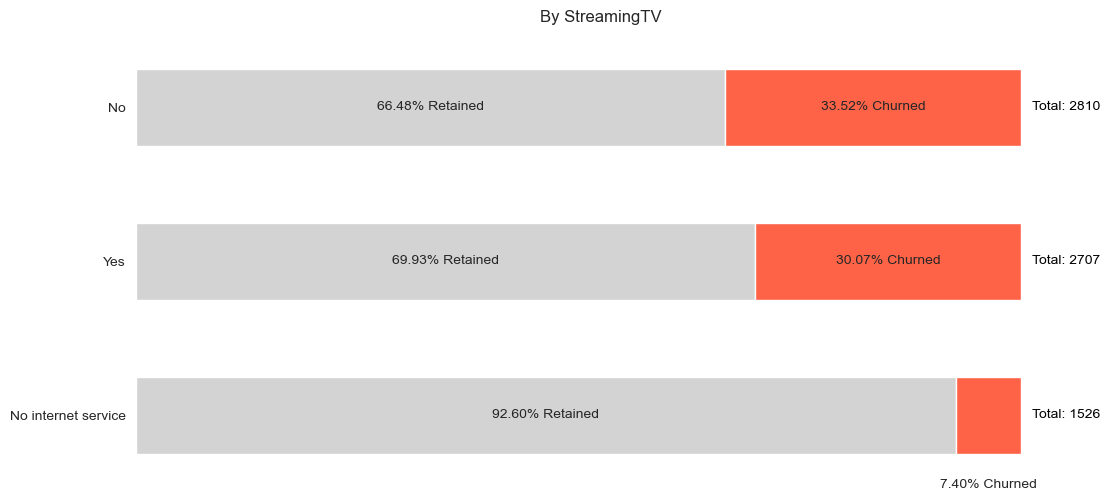

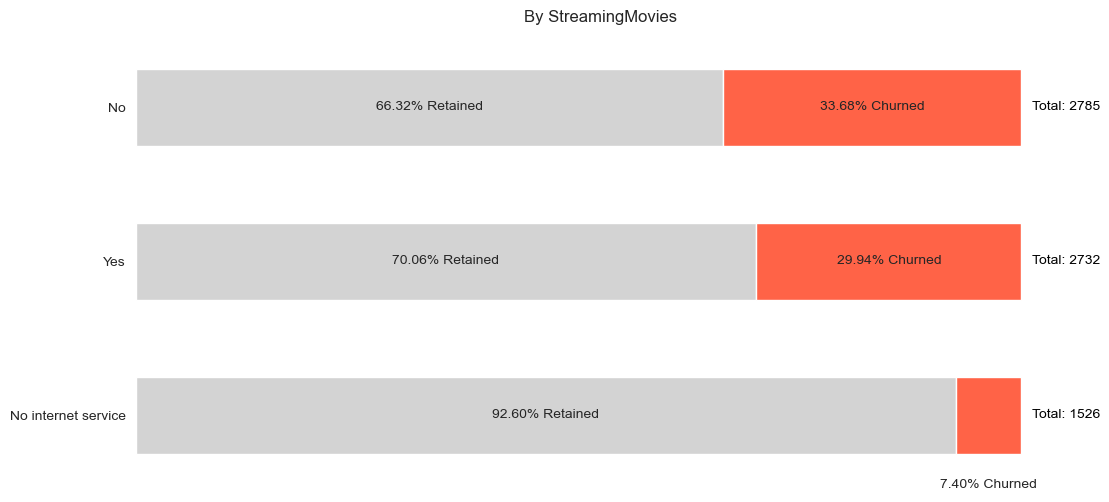

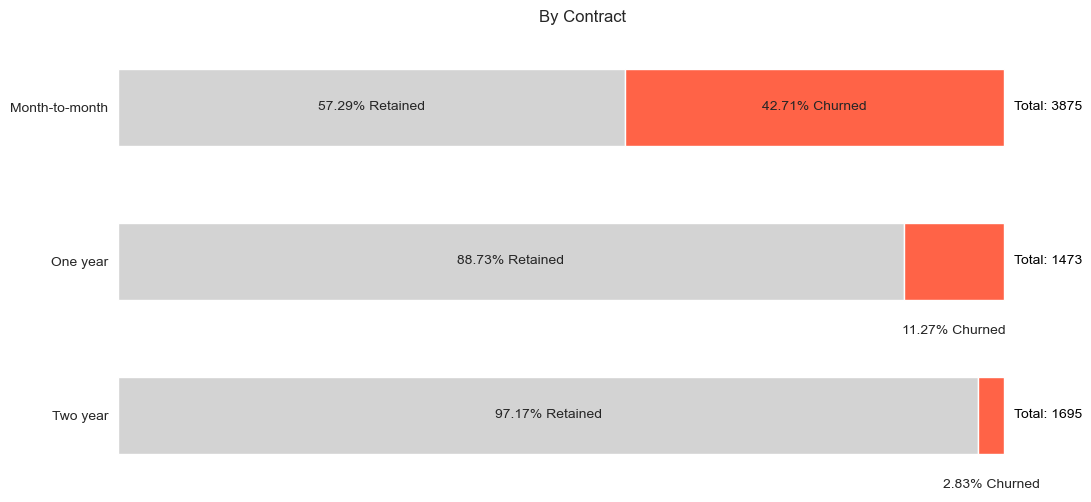

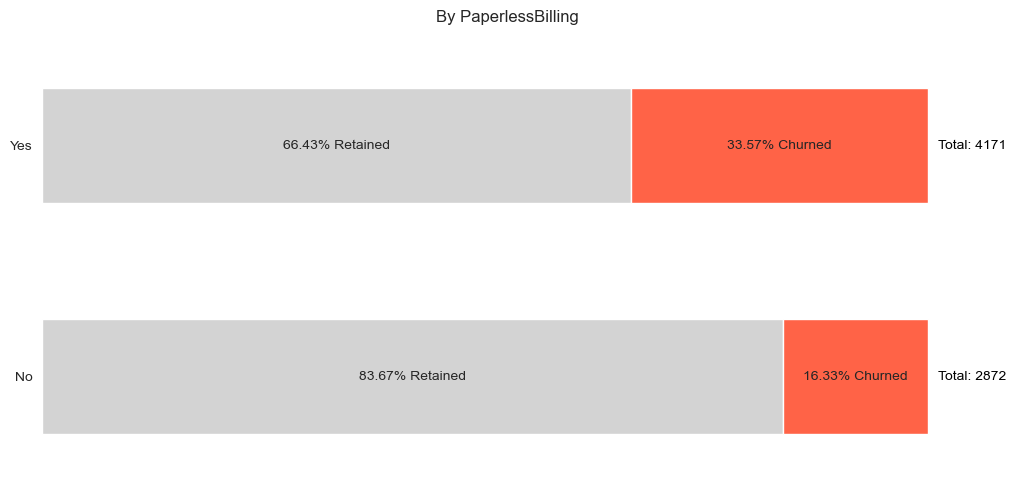

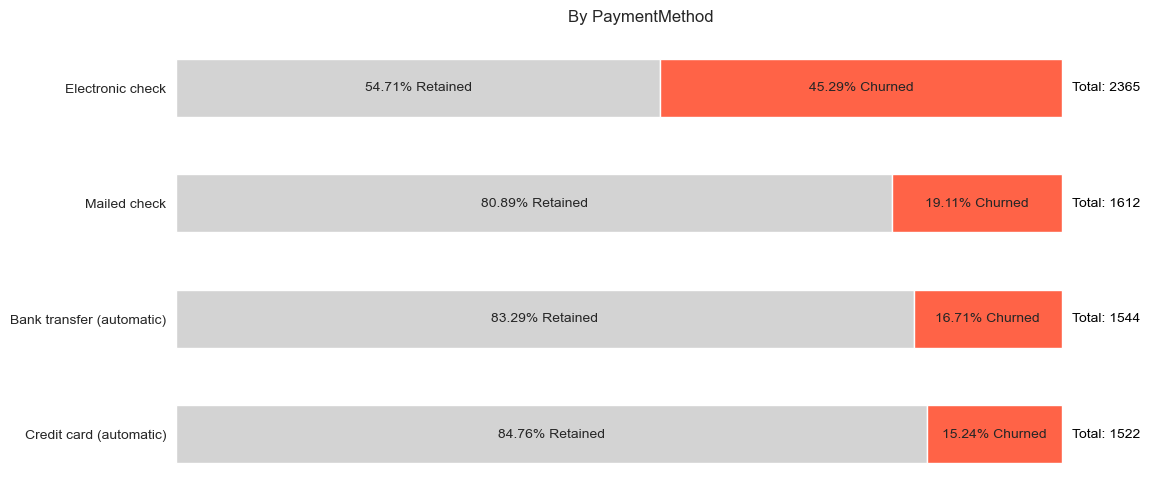

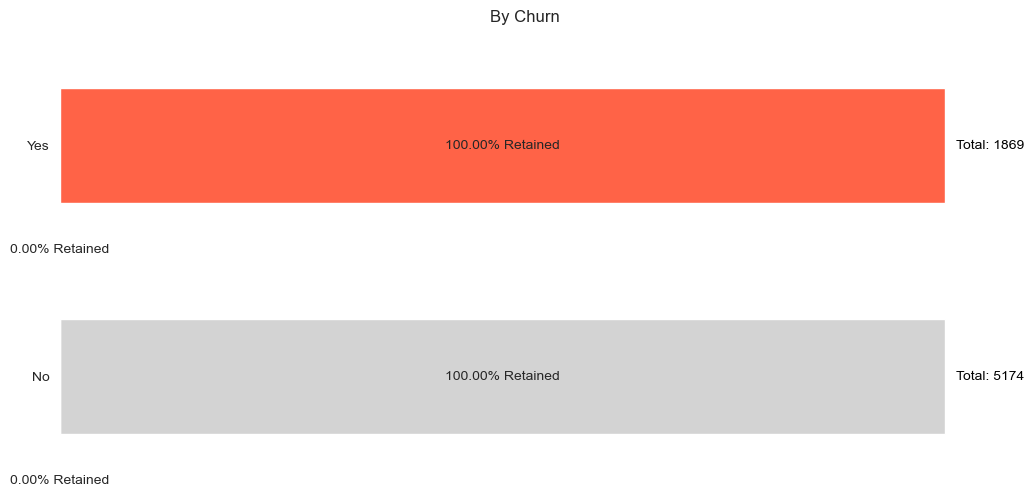

In [251]:
def plot_final_horizontal_churn_rate_sorted_corrected_v2(df, feature_col, target_col='Churn'):
    # Drop NaN values, if any
    df = df.dropna(subset=[feature_col, target_col])

    # Calculate the churn rate percentages
    churn_data = df.groupby([feature_col, target_col]).size().unstack(fill_value=0)
    churn_data_percentage = churn_data.div(churn_data.sum(axis=1), axis=0) * 100

    # Sort by the percentage of 'Yes' to get the highest churn rate at the top, if 'Yes' exists
    if 'Yes' in churn_data_percentage.columns:
        churn_data_percentage = churn_data_percentage.sort_values(by='Yes', ascending=True)

    total_counts = df[feature_col].value_counts().reindex(churn_data_percentage.index)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    churn_data_percentage.plot(kind='barh', stacked=True, ax=ax, legend=False, color=['#D3D3D3', '#FF6347'])  # Grey for 'Retained', Lighter Red for 'Churned'

    # Remove grid, x-axis and axis labels
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.set_frame_on(False)  # Remove grey grid around the plot

    # Remove dashes at the start of each bar
    ax.tick_params(axis='y', which='both', left=False)

    # Add title back as "By [Category Name]"
    ax.set_title(f'By {feature_col}')

    # Add annotations for percentages and total counts
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        # Correctly label as 'Retained' or 'Churned'
        label_text = 'Retained' if p.get_x() == 0 else 'Churned'

        label = f"{width:.2f}% {label_text}"

        # Position the label inside the bar when it fits, otherwise below the bar
        if width > 15:
            ax.annotate(label, (x + width/2, y + height/2), ha='center', va='center')
        else:
            ax.annotate(label, (x + width/2, y - 0.2), ha='center', va='center')

    # Explicitly convert the index to a list and iterate through it
    for i, index in enumerate(list(total_counts.index)):
        value = total_counts.loc[index]
        ax.annotate(f'Total: {value}', (105, i), ha='center', va='center', fontsize=10, color='black')

# Define the columns for which you want to generate the plots
selected_object_cols = [col for col in customer_df.columns if customer_df[col].dtype == 'object']

# Generate the plots for each selected column
for col in selected_object_cols:
    plot_final_horizontal_churn_rate_sorted_corrected_v2(customer_df, col)
    plt.show()


In [252]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


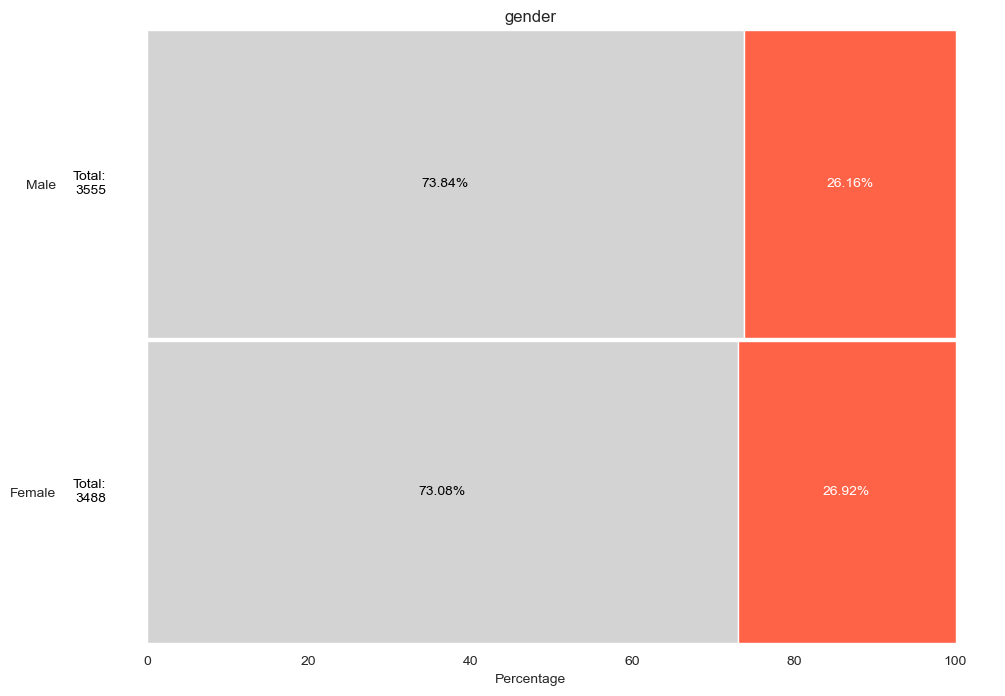

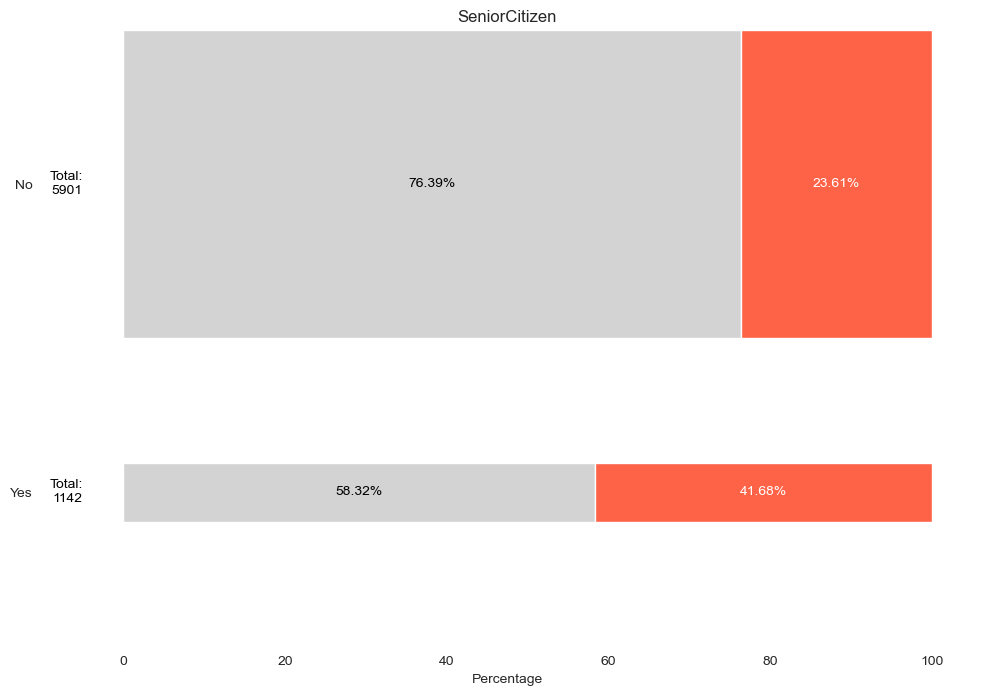

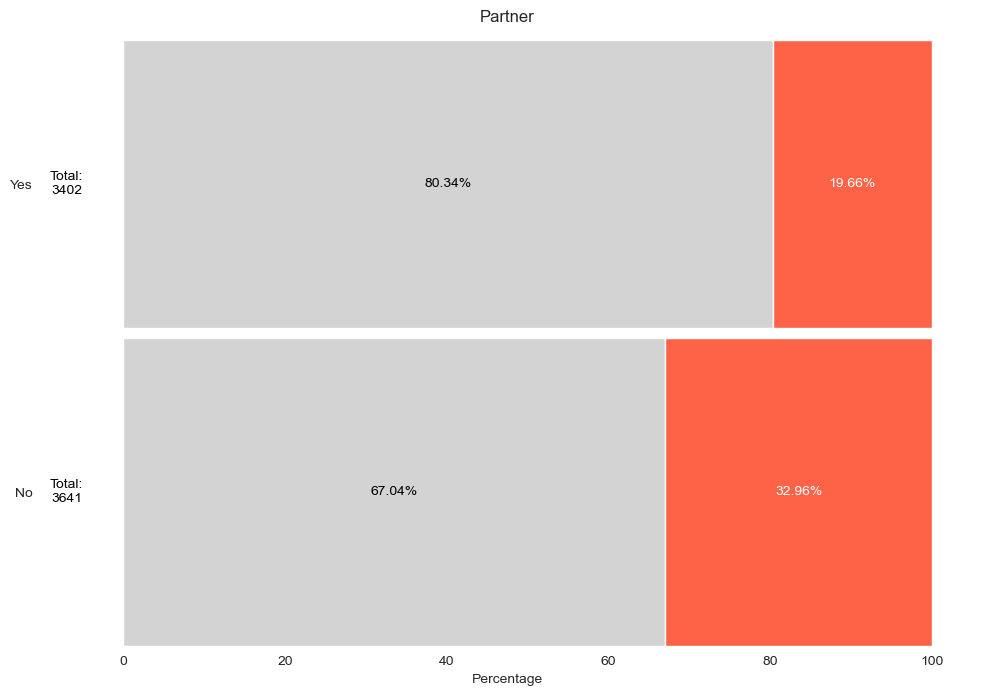

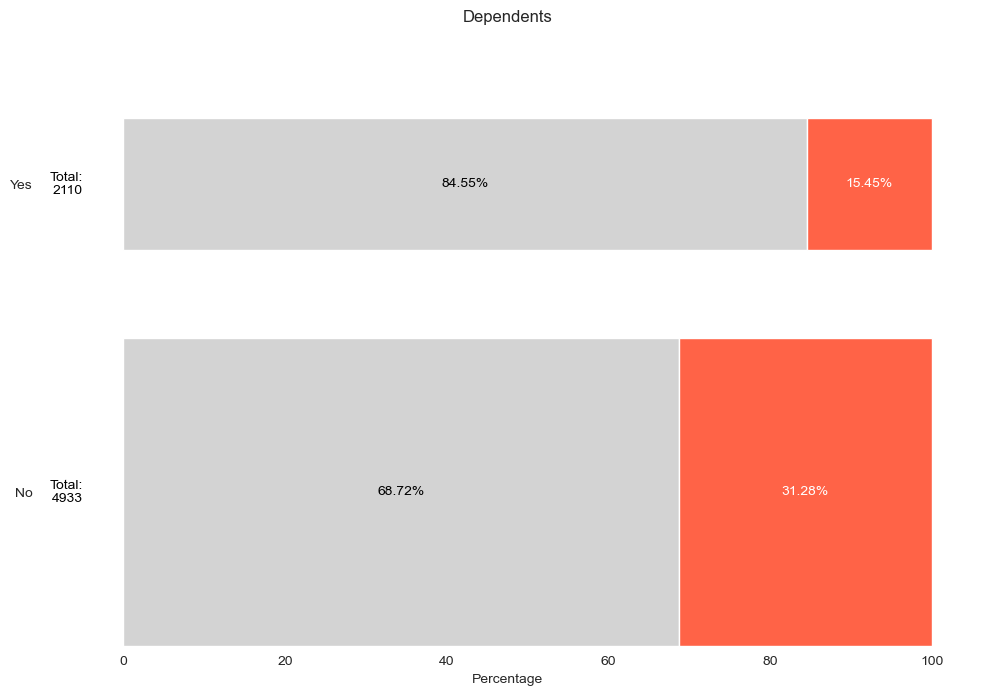

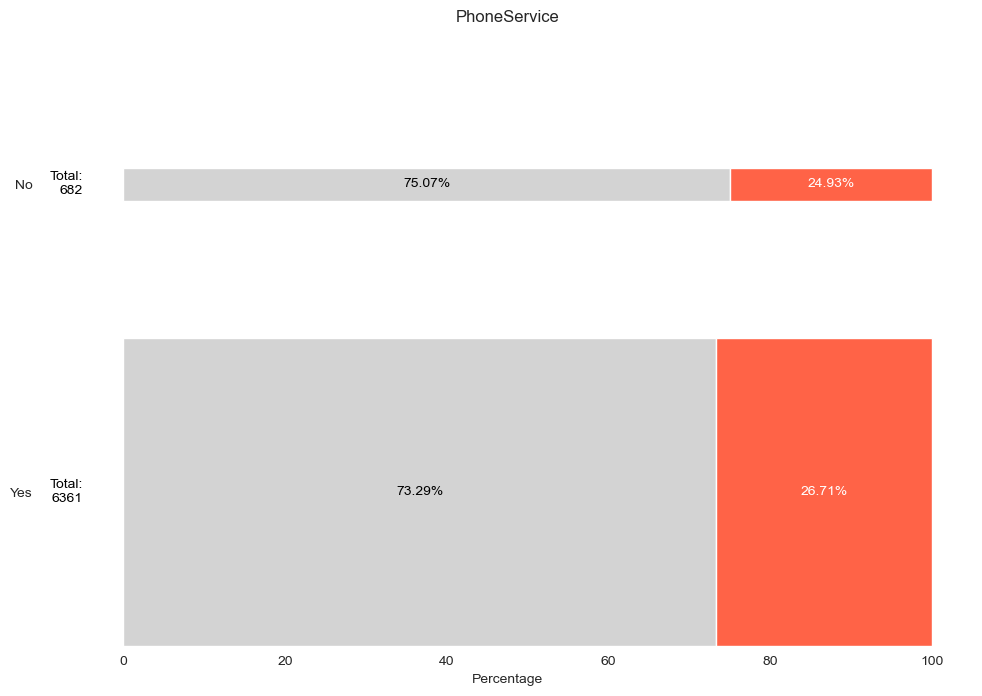

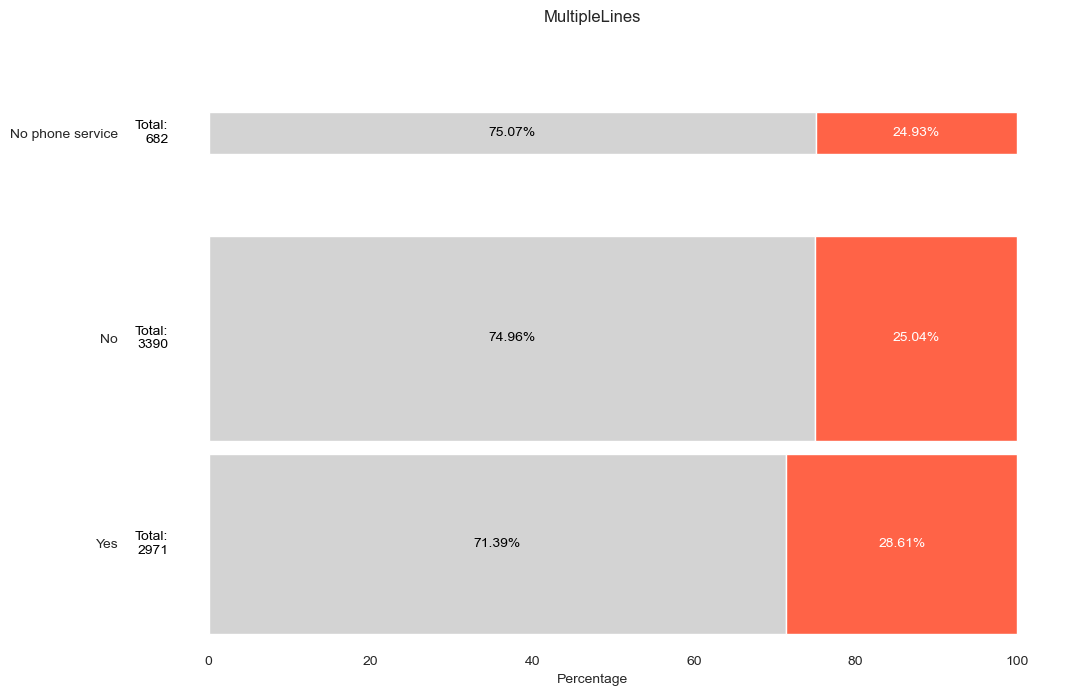

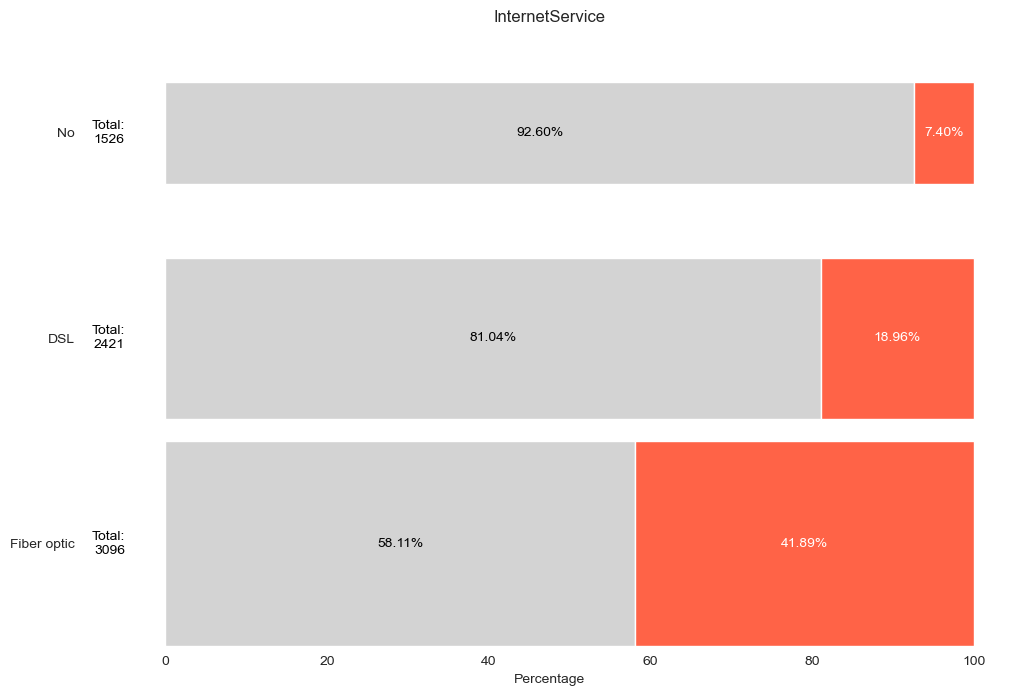

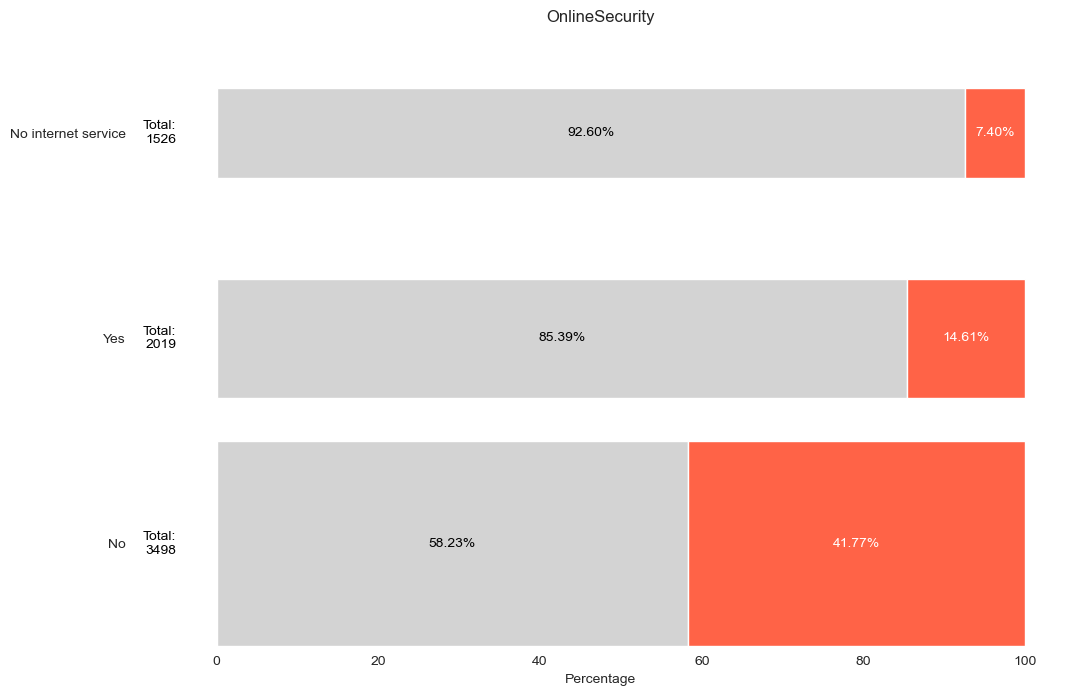

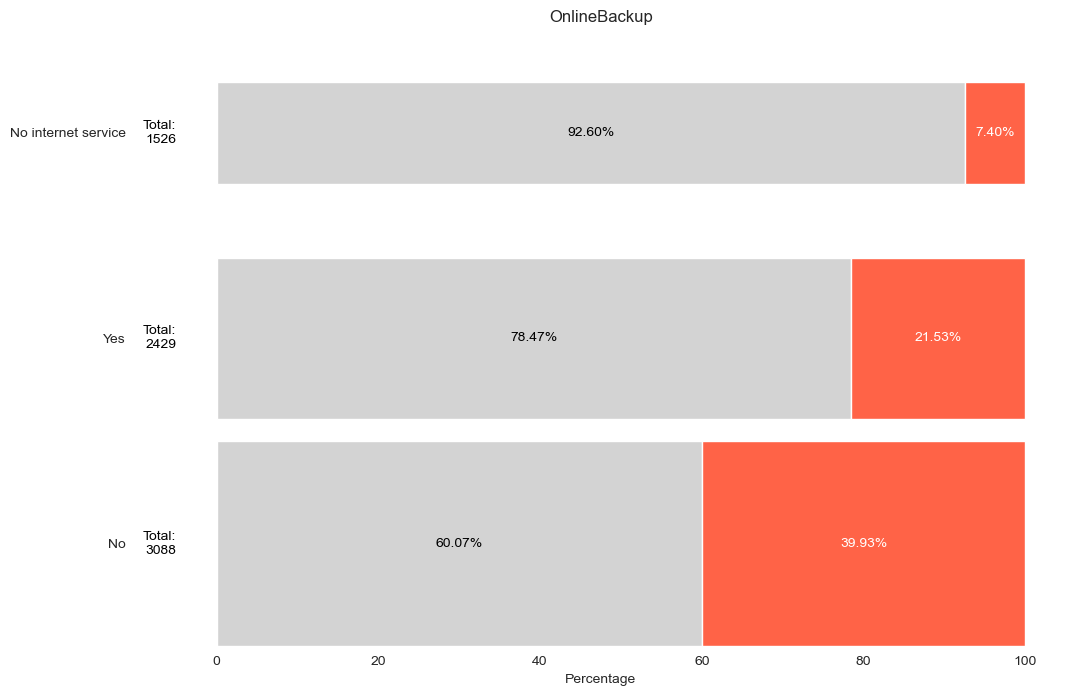

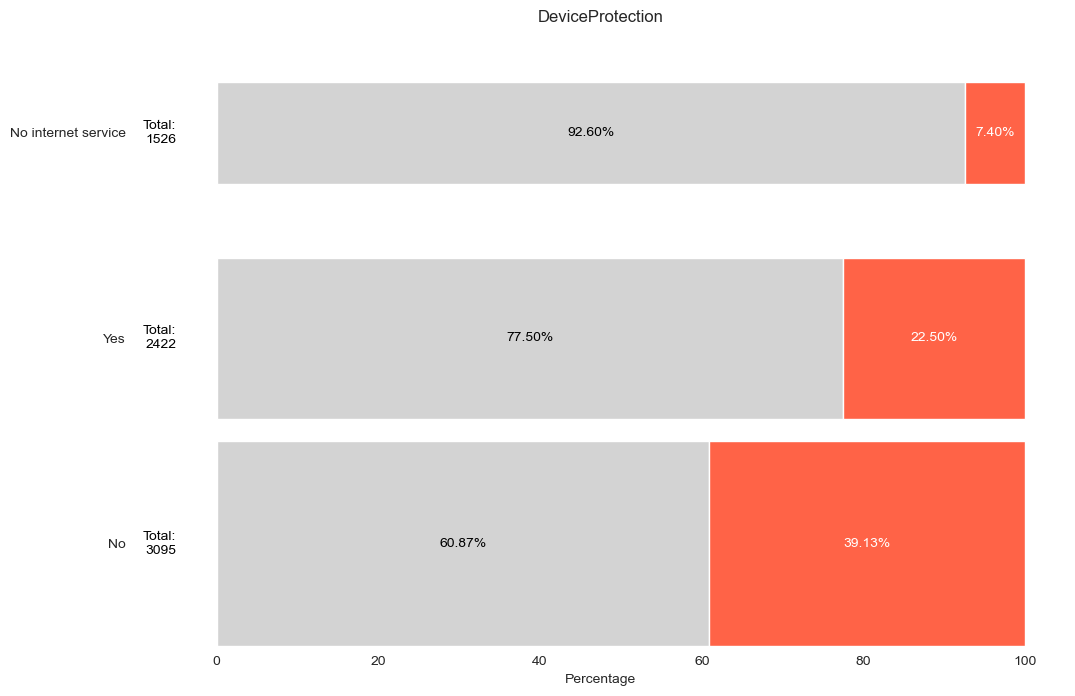

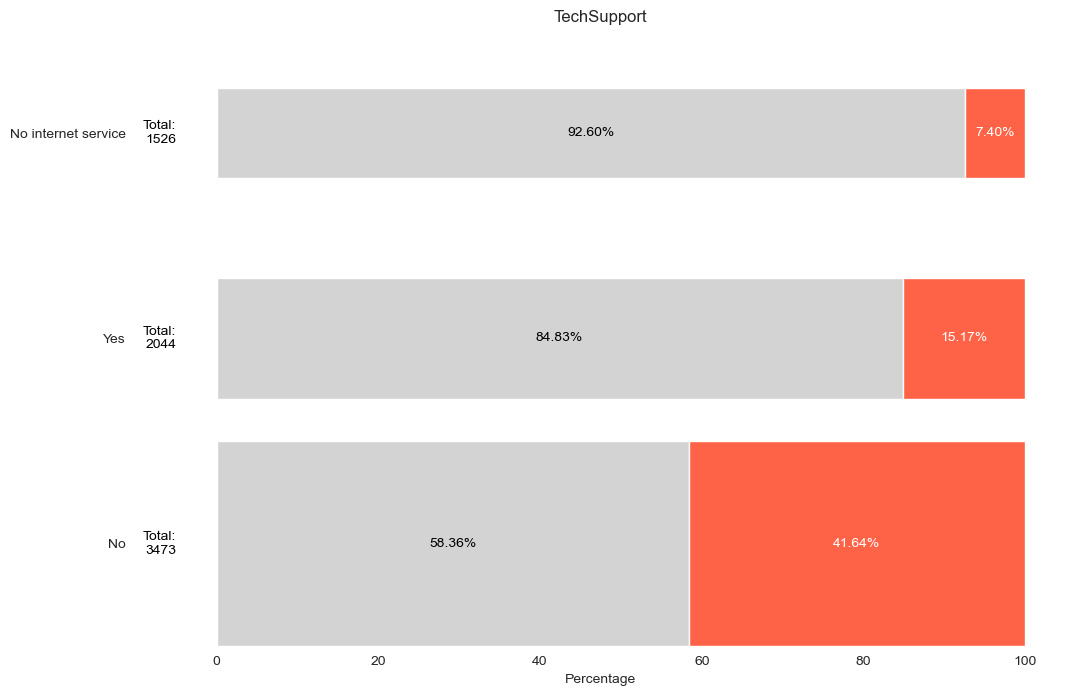

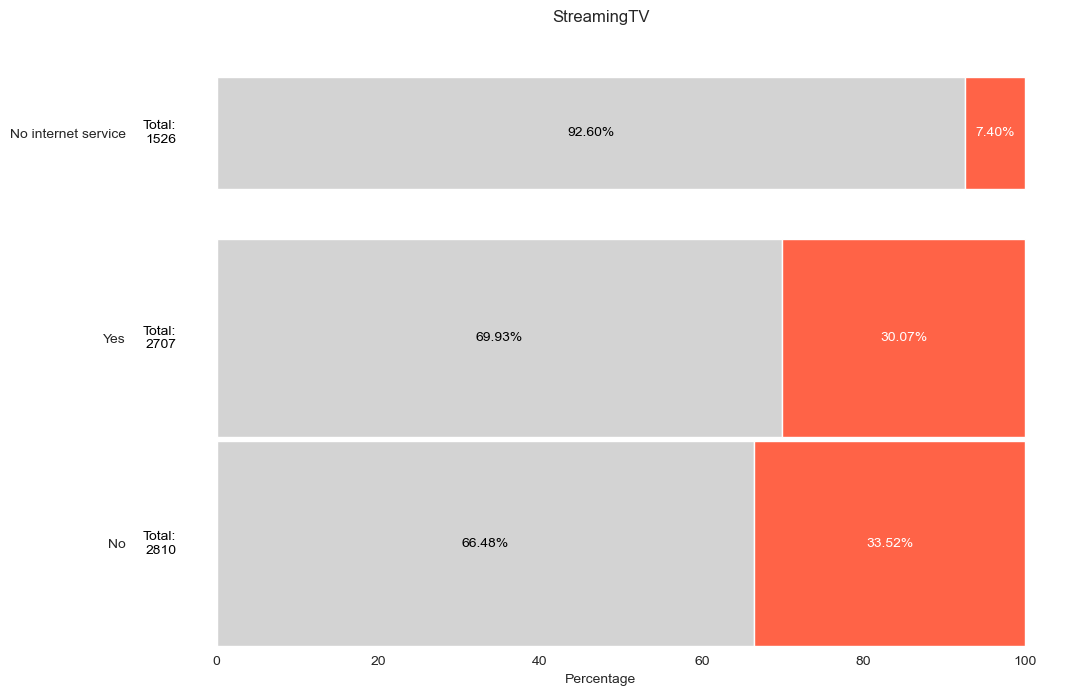

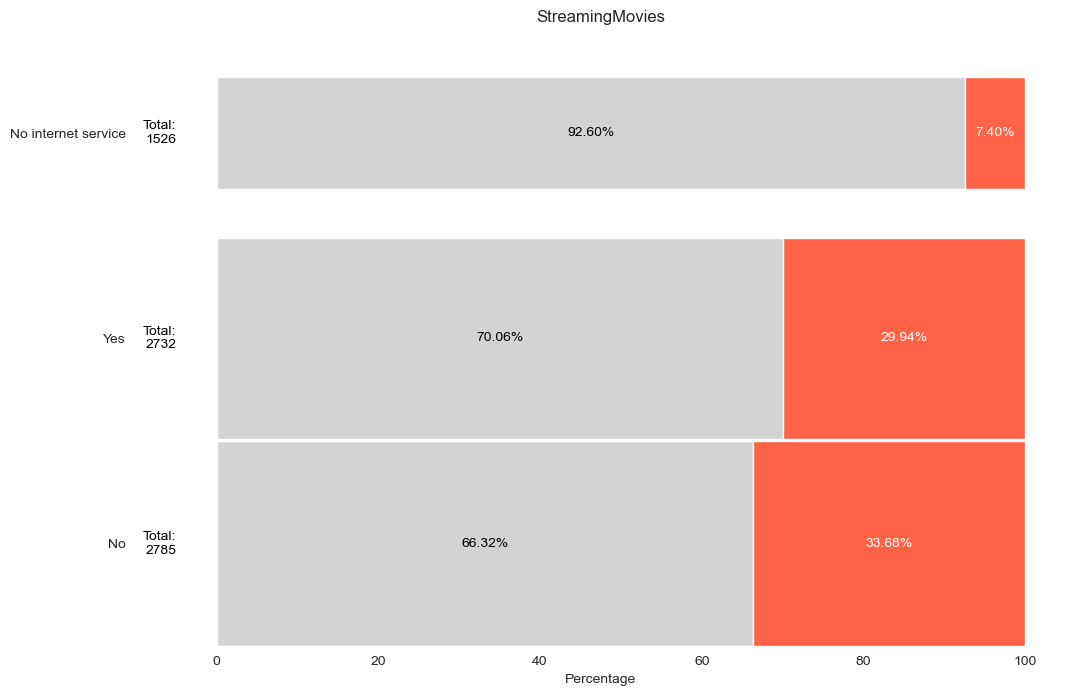

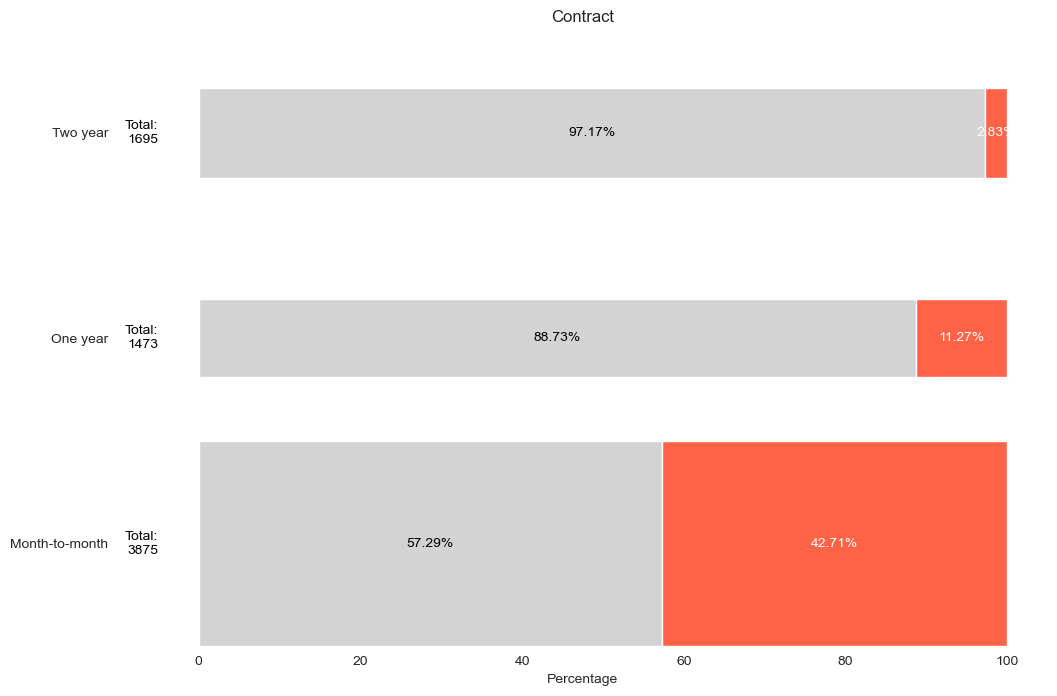

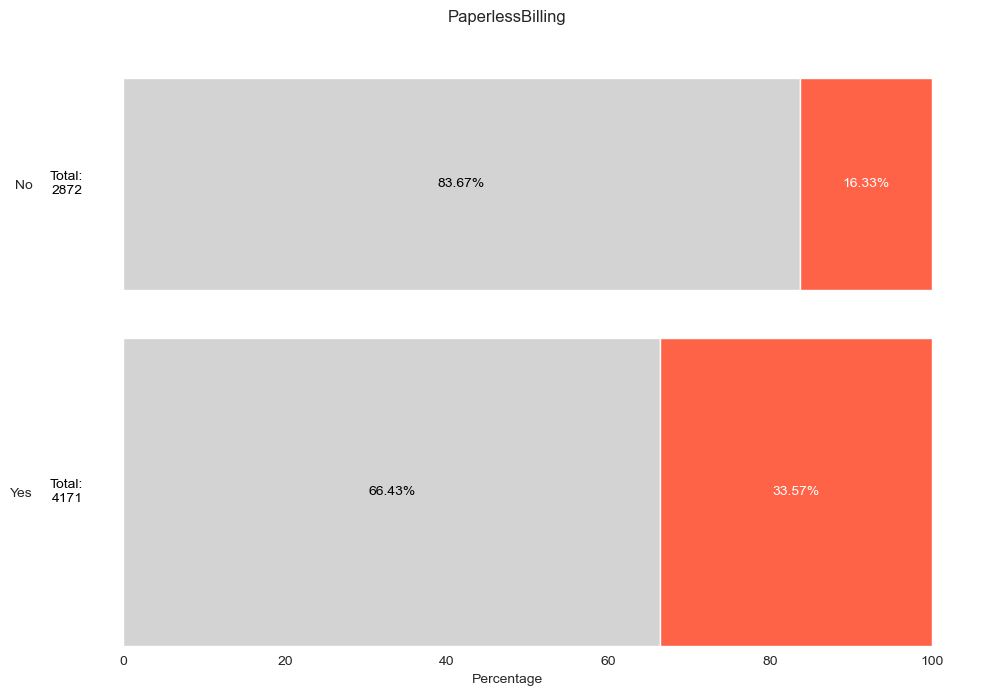

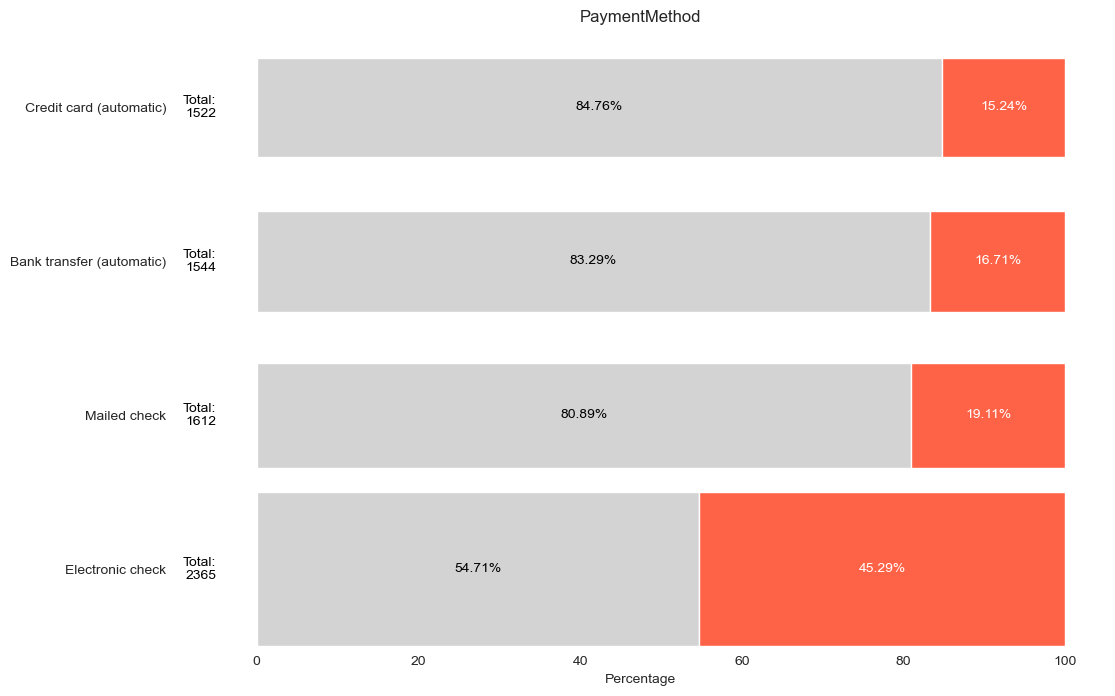

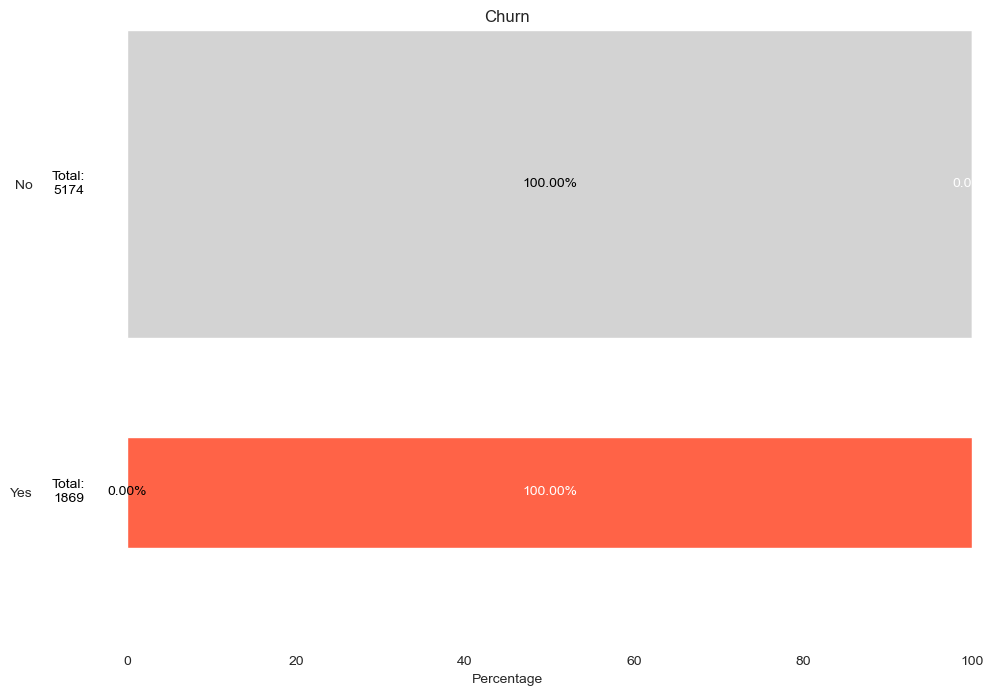

In [253]:
import matplotlib.patches as mpatches

def plot_churn_rate_with_dynamic_height(df, feature_col, target_col='Churn'):
    # Drop NaN values, if any
    df = df.dropna(subset=[feature_col, target_col])

    # Calculate the churn rate percentages and total counts
    churn_data = df.groupby([feature_col, target_col]).size().unstack(fill_value=0)
    
    # Ensure both 'Yes' and 'No' columns are present
    churn_data['Yes'] = churn_data.get('Yes', 0)
    churn_data['No'] = churn_data.get('No', 0)
    
    churn_data_percentage = churn_data.div(churn_data.sum(axis=1), axis=0) * 100

    # Sort by the percentage of 'Yes'
    churn_data_percentage = churn_data_percentage.sort_values(by='Yes', ascending=False)

    # Calculate the total counts for each category in the feature column
    total_counts = df[feature_col].value_counts().reindex(churn_data_percentage.index)

    # # VERSION 1: Normalize the heights based on total counts
    # max_height = 0.8  # This can be adjusted depending on your preference for bar thickness
    # heights = total_counts / total_counts.max() * max_height

    # VERSION B: Normalize the heights based on total counts
    max_height = 1  # You can adjust this value to make the bars thicker
    total_count_max = total_counts.max()
    heights = total_counts / total_count_max * max_height

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('white')  # Set the background color of the figure
    ax.set_facecolor('white')  # Set the background color of the axes

    # Plot bars with dynamic heights
    for i, (index, row) in enumerate(churn_data_percentage.iterrows()):
        ax.barh(index, row['No'], height=heights[index], color='#D3D3D3')
        ax.barh(index, row['Yes'], left=row['No'], height=heights[index], color='#FF6347')

        # # Set Font Sizes
        # ax.text(row['No'] / 2, i, f"{row['No']:.2f}%", va='center', ha='center', color='black', fontsize=12)
        # ax.text(row['No'] + row['Yes'] / 2, i, f"{row['Yes']:.2f}%", va='center', ha='center', color='white', fontsize=12)
    
    # Add value labels to each bar
    for i, (index, row) in enumerate(churn_data_percentage.iterrows()):
        ax.text(row['No'] / 2, i, f"{row['No']:.2f}%", va='center', ha='center', color='black', fontsize=10)
        ax.text(row['No'] + row['Yes'] / 2, i, f"{row['Yes']:.2f}%", va='center', ha='center', color='white', fontsize=10)

        # # Version A
        # if i == 0:
        #     ax.text(0, i, 'Retained', va='center', ha='left', color='grey', fontsize=10, fontweight='bold')
        #     ax.text(row['No'] + row['Yes'], i, 'Churned', va='center', ha='right', color='red', fontsize=10, fontweight='bold')
    
    # Add total counts at the end of each bar
    for i, (index, total) in enumerate(total_counts.items()):
        # Version 2
        # ax.text(row['No'] + row['Yes'], i, f" Total: {total}", va='center', ha='left', color='black', fontsize=10)

        # Version 3: Moving Total to the Left of the Bar
        y_position = i  # Adjust this value as needed to position the text correctly
        ax.text(-5, y_position, f"Total:\n{total}", va='center', ha='right', color='black', fontsize=10)
        # Version 1
        # ax.text(row['No'] + row['Yes'], i, f" Total: {total}", va='center', ha='left', color='black', fontsize=12)

    # Set title and labels
    ax.set_title(f'{feature_col}')
    ax.set_xlabel('Percentage')

    # Part of Version 3
    ax.set_xlim(left=min(ax.get_xlim()[0], -10))  # Adjust the left limit as needed

    # Now the y-ticks have been created, set the labels
    ax.set_yticks(range(len(churn_data_percentage)))
    ax.set_yticklabels(churn_data_percentage.index)

    ax.invert_yaxis()  # Invert y-axis to have the bar with the highest 'Yes' at the top

        # Adjust the y-axis limits to reduce vertical white space
    ax.set_ylim(-0.5, len(churn_data_percentage) - 0.5)

    # Create custom handles for the legend
    handles = [mpatches.Patch(color='#D3D3D3', label='Retained'),
            mpatches.Patch(color='#FF6347', label='Churned')]
    
    # Remove spines and create legend
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.legend(handles=handles)



    plt.show()

# Example usage:
for col in selected_object_cols:
    plot_churn_rate_with_dynamic_height(customer_df, col)

Creating Numeric Plots

In [254]:
# Show only numeric columns
numeric_cols = [col for col in customer_df.columns if customer_df[col].dtype != 'object']
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

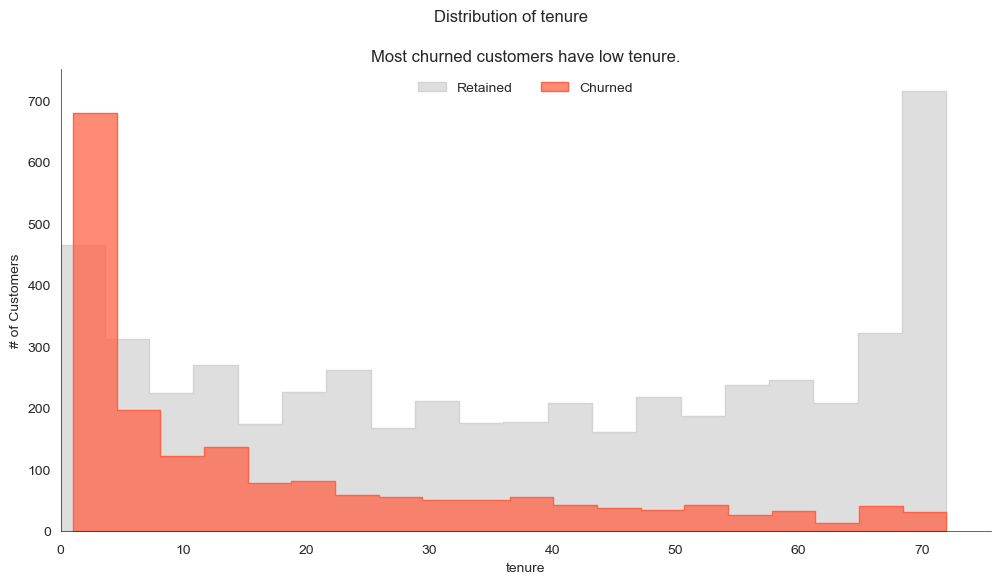

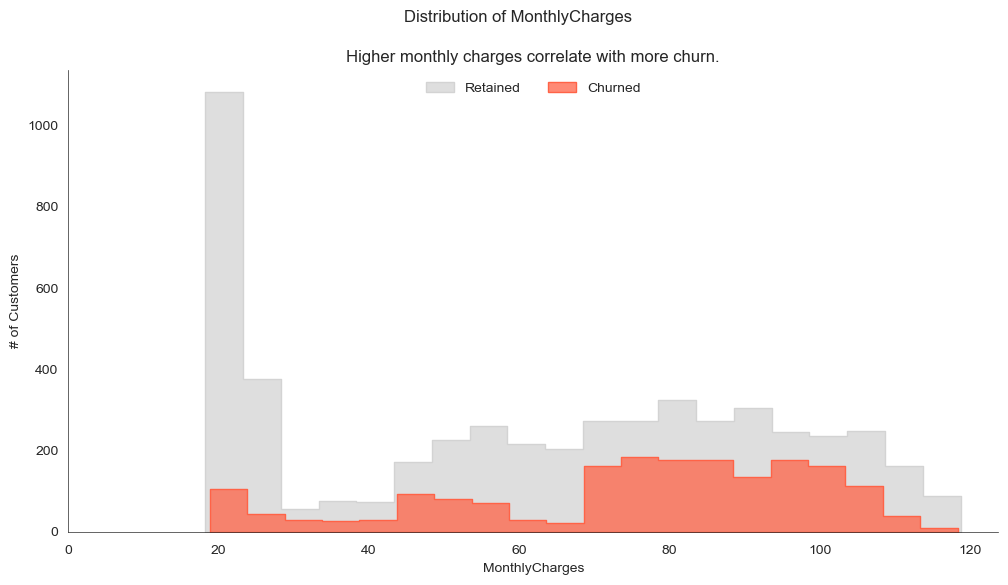

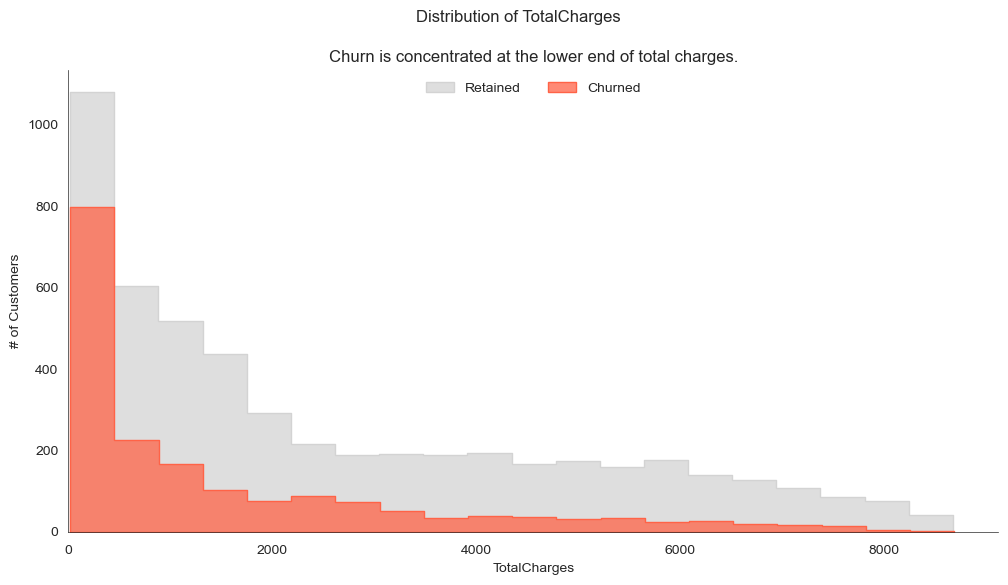

In [255]:
# Function to create overlay histograms using Seaborn with Churn/Not Churn distinction,
# restored x-axis + y-axis lines, and annotations for insights
def plot_seaborn_overlay_histograms_annotated(df, numeric_cols, target_col='Churn'):
    insights = {
        'tenure': 'Most churned customers have low tenure.',
        'MonthlyCharges': 'Higher monthly charges correlate with more churn.',
        'TotalCharges': 'Churn is concentrated at the lower end of total charges.'
    }
    
    # Set the style to 'white' to remove the grey background
    sns.set_style("white")

    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Then create histogram for Retained customers
        sns.histplot(df[df[target_col] == 'No'], x=col, element="step", stat="count", common_norm=False,
                     bins=20, color='#D3D3D3', ax=ax, label='Retained')
        
        # Create histogram for Churned customers first
        sns.histplot(df[df[target_col] == 'Yes'], x=col, element="step", stat="count", common_norm=False,
                     bins=20, color='#FF6347', ax=ax, label='Churned')
        
        # Remove grid lines
        ax.grid(False)
        
        # Restore x-axis and y-axis lines
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.spines['left'].set_linewidth(0.5)

        # Add ticks (dashes) above each number on the x-axis
        ax.xaxis.set_tick_params(direction='out', length=6, width=0.5)
        
        # Set the x-axis to start at 0
        ax.set_xlim(left=0)

        # Set title and labels
        ax.figure.suptitle(f'Distribution of {col}')
        ax.set_title(insights[col])   # Subtitle, acting as the title of ax        ax.set_xlabel(col)
        ax.set_ylabel('# of Customers')
        
        # Add option to toggle legend on/off, without title
        legend = ax.legend(labels=['Retained', 'Churned'], loc='upper center', ncol=2, frameon=False)
        legend.set_title(None)
        
        # Add insights as text annotations
        # ax.annotate(insights[col], xy=(0.375, 0.5), xycoords='axes fraction', fontsize=10, ha='center', va='center')
        
        plt.show()

# Generate overlay histograms using Seaborn for numeric columns, without legend title and with insights
plot_seaborn_overlay_histograms_annotated(customer_df, numeric_cols)


#### Calculating Correlation Between Categorical Variables (before Encoding) & target Variable

To calculate the association between categorical features and a binary target variable, you can use statistical measures like Cramér's V or the Chi-squared test. Cramér's V is based on a chi-squared statistic and provides a measure of association between two nominal variables. It's particularly useful for understanding the strength of the relationship between categorical features and a binary target.

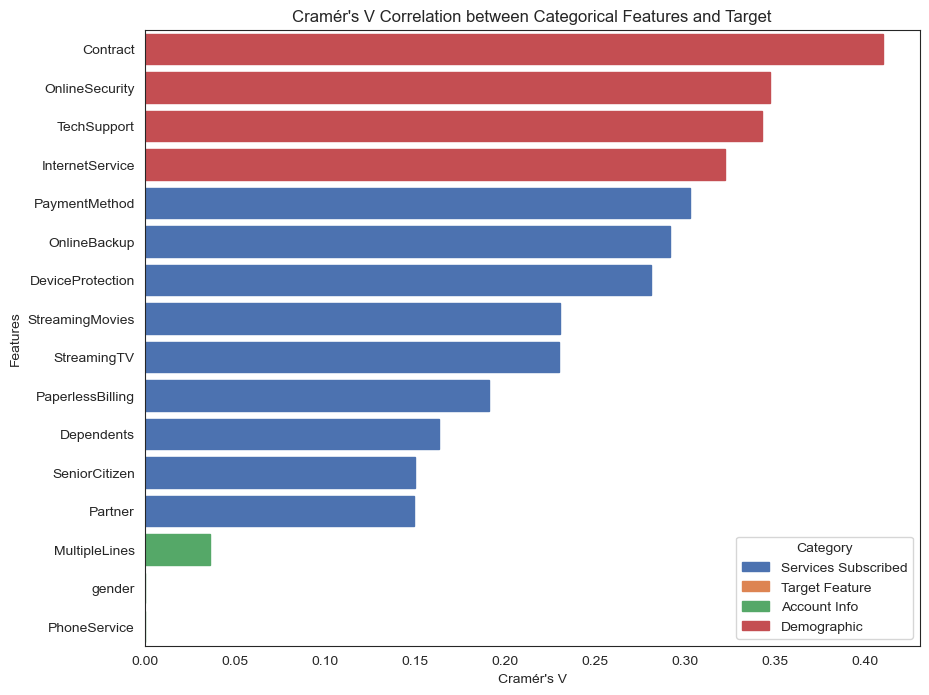

In [256]:
from scipy.stats import chi2_contingency

# Define Cramer's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming 'customer_df_one_hot_encoded' is your DataFrame and 'Churn' is your target variable
data = customer_df  # Replace with your actual DataFrame
target = data['Churn']  # Replace with your actual target column

# Calculate Cramer's V for each categorical feature
cramers_values = []
for column in data.select_dtypes(include=['object', 'category']).columns:
    if column != 'Churn':  # Skip the 'Churn' column
        cramers_v_value = cramers_v(data[column], target)
        cramers_values.append((column, cramers_v_value))

# Convert to DataFrame for easy plotting
cramers_df = pd.DataFrame(cramers_values, columns=['Feature', 'Cramers_V']).sort_values(by='Cramers_V', ascending=False)

feature_to_category = {
    'customerID': 'Account Info',
    'gender': 'Demographic',
    'SeniorCitizen': 'Demographic',
    'Partner': 'Demographic',
    'Dependents': 'Demographic',
    'tenure': 'Account Info',
    'PhoneService': 'Services Subscribed',
    'MultipleLines': 'Services Subscribed',
    'InternetService': 'Services Subscribed',
    'OnlineSecurity': 'Services Subscribed',
    'OnlineBackup': 'Services Subscribed',
    'DeviceProtection': 'Services Subscribed',
    'TechSupport': 'Services Subscribed',
    'StreamingTV': 'Services Subscribed',
    'StreamingMovies': 'Services Subscribed',
    'Contract': 'Account Info',
    'PaperlessBilling': 'Account Info',
    'PaymentMethod': 'Account Info',
    'MonthlyCharges': 'Account Info',
    'TotalCharges': 'Account Info',
    'Churn': 'Target Feature'
}

# Choose a Seaborn color palette
palette = sns.color_palette("deep")  # Or "muted", or "deep"

# Ensure there are enough colors for your categories
palette = palette * (len(set(feature_to_category.values())) // len(palette) + 1)

# Assign each category a color from the palette
unique_categories = list(set(feature_to_category.values()))
category_color_mapping = {category: color for category, color in zip(unique_categories, palette)}

# Map features to their corresponding color
colors = cramers_df['Feature'].apply(lambda feature: category_color_mapping[feature_to_category[feature]])

# Plotting each bar with a specific color
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Cramers_V', y='Feature', data=cramers_df, color='lightgray')  # Use a neutral color as base

# Color each bar with the corresponding color from the mapping
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i])

# Create legend handles manually
handles = [plt.Rectangle((0,0),1,1, color=category_color_mapping[category]) for category in unique_categories]
labels = unique_categories


plt.title('Cramér\'s V Correlation between Categorical Features and Target')
plt.xlabel('Cramér\'s V')
plt.ylabel('Features')
plt.legend(handles, labels, title='Category')
plt.show()

### Scaling Numerical Features
When you're working with a dataset that includes both one-hot encoded categorical features and numerical features, using a StandardScaler can be a bit nuanced.<br>

If your dataset contains both types of features and you decide to use StandardScaler, you should apply it only to the numerical features. You can achieve this by scaling the numerical features separately and then combining them back with the one-hot encoded features before training your model. Here's a basic approach to doing this with Python and pandas:

In [257]:
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into numerical and categorical features
numerical_features = customer_df.select_dtypes(include=['int64', 'float64'])
categorical_features = customer_df.select_dtypes(include=['object', 'category'])

# Applying StandardScaler to the numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_features)
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features.columns)

# Combining scaled numerical features and categorical features
customer_df = pd.concat([scaled_numerical_df, categorical_features], axis=1)

### Encoding Columns So We Can Run Machine Learning Algorithms

We are using One-Hot Encoding: Each category is transformed into a new binary column, where the presence of the category is marked by 1 and absence by 0. Suitable for nominal data where no ordinal relationship exists.

In [258]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify columns with only two unique values
binary_cols = [col for col in customer_df.columns if customer_df[col].nunique() == 2 and customer_df[col].dtype == 'object']

# Apply LabelEncoder on each of the binary columns
for col in binary_cols:
    customer_df[col] = label_encoder.fit_transform(customer_df[col])

# Show the first few rows of the DataFrame after label encoding binary columns
customer_df.head()


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-0.994194,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0
1,0.066327,-0.259629,-0.173740,1,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0
2,-1.236724,-0.362660,-0.959649,1,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,1
3,0.514251,-0.746535,-0.195248,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0
4,-1.236724,0.197365,-0.940457,0,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,1


In [259]:
# Identify columns where dtype is 'object' and have more than two unique values
multi_valued_object_cols = [col for col in customer_df.columns if customer_df[col].nunique() > 2 and customer_df[col].dtype == 'object']

# Apply One-Hot Encoding only to these columns and getting 1 for True and 0 for false. Dropping first dummy to avoid "dummy variable trap"
customer_df_one_hot_encoded = pd.get_dummies(customer_df, columns=multi_valued_object_cols, drop_first=True)

# Show the first few rows of the DataFrame after one-hot encoding
customer_df_one_hot_encoded.head()

customer_df_one_hot_encoded = customer_df_one_hot_encoded * 1

customer_df_one_hot_encoded.head()


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,-1.236724,-0.362660,-0.959649,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.514251,-0.746535,-0.195248,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,-1.236724,0.197365,-0.940457,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


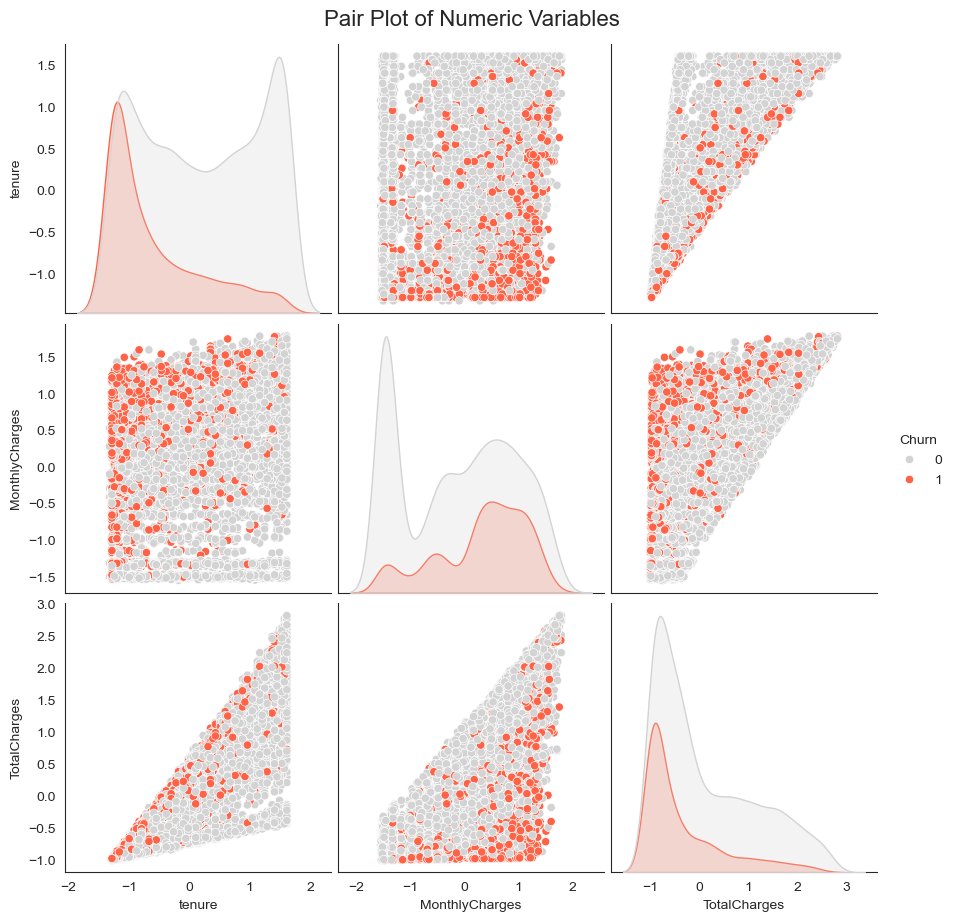

In [260]:
numeric_columns = numeric_cols + ['Churn']

subset_df = customer_df[numeric_columns]

# Define a custom color palette for Churn: 0 and 1
churn_palette = {0: "#D3D3D3", 1: "#FF6347"}  # You can choose your colors here


# # Create the pair plot
sns.pairplot(subset_df, hue='Churn', palette=churn_palette, height=3)

# Adding title
plt.suptitle('Pair Plot of Numeric Variables', size=16, y=1.02)

# Show the plot
plt.show()

In [261]:
# Fill TotalCharges with the average for that column
customer_df_one_hot_encoded['TotalCharges'] = customer_df_one_hot_encoded['TotalCharges'].fillna(customer_df_one_hot_encoded['TotalCharges'].mean())

### Assessing Multicollinearity

#### Calculate Correlations with Target Variable

In [262]:
customer_df_one_hot_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,-1.236724,-0.362660,-0.959649,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.514251,-0.746535,-0.195248,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,-1.236724,0.197365,-0.940457,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


The Point-Biserial Correlation Coefficient is used in statistics to measure the strength and direction of the association that exists between one continuous variable and one binary categorical variable. 

In [263]:
# from scipy.stats import pointbiserialr

# # Assuming 'customer_df_one_hot_encoded' is your DataFrame and 'Churn' is your target variable
# data = customer_df_one_hot_encoded  # Replace with your actual DataFrame
# target = 'Churn'  # Replace with your actual target column name

# # Initialize a list to store correlation values
# correlations = []

# # Calculate the correlation of each feature with the target
# for column in data.columns:
#     if data[column].dtype != 'O' and column != target:  # Exclude non-numeric columns and the target itself
#         corr, _ = pointbiserialr(data[column], data[target])
#         correlations.append((column, corr))

# # Convert to DataFrame for easy plotting
# correlation_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation']).sort_values(by='Correlation', ascending=False)

# # Plotting
# plt.figure(figsize=(10, 8))
# sns.barplot(x='Correlation', y='Feature', data=correlation_df)
# plt.title('Feature Correlation with Target Variable')
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Features')
# plt.show()

#### Correlation Matrix 1: No Features Dropped Yet

In [264]:
# Separate the target variable from the features
X = customer_df_one_hot_encoded.drop('Churn', axis=1)
y = customer_df_one_hot_encoded['Churn']

In [265]:
# # Calculate the correlation matrix
# corr_matrix = X.corr()

# # Assuming corr_matrix is your correlation matrix
# plt.figure(figsize=(15, 12))  # Increase figure size
# sns.set(font_scale=0.8)  # Increase font size

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Create a custom annot function
# def custom_annot(data, threshold):
#     mask_data = np.where(abs(data) > threshold, data, np.nan)
#     annot = np.where(np.isnan(mask_data), "", mask_data.round(2))
#     return annot

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=custom_annot(corr_matrix, 0.7), fmt="", square=True, linewidths=.5)

# plt.title("Feature Correlation Matrix")
# plt.show()

# # Identifying highly correlated features
# threshold = 0.8  # This threshold can be adjusted
# high_corr_features = set()

# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             colname = corr_matrix.columns[i]
#             high_corr_features.add(colname)

# print("Highly correlated features to consider dropping: ", high_corr_features)

# features_to_drop = high_corr_features

# # Dropping these features from the DataFrame
# customer_df_one_hot_encoded = customer_df_one_hot_encoded.drop(features_to_drop, axis=1)

Some of these features are related to one another (for example No internet service is found multiple times), so it logically makes sense that high multicollinearity would occur. We will remove highly correlated features.

#### Correlation Matrix 2: Post Features Dropped

In [266]:
# # Separate the target variable from the features
# X = customer_df_one_hot_encoded.drop('Churn', axis=1)
# y = customer_df_one_hot_encoded['Churn']

# # Calculate the correlation matrix
# corr_matrix = X.corr()

# # Assuming corr_matrix is your correlation matrix
# plt.figure(figsize=(15, 12))  # Increase figure size
# sns.set(font_scale=0.8)  # Increase font size

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Create a custom annot function
# def custom_annot(data, threshold):
#     mask_data = np.where(abs(data) > threshold, data, np.nan)
#     annot = np.where(np.isnan(mask_data), "", mask_data.round(2))
#     return annot

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=custom_annot(corr_matrix, 0.7), fmt="", square=True, linewidths=.5)

# plt.title("Feature Correlation Matrix [Post Features Dropped]")
# plt.show()

# # Identifying highly correlated features
# threshold = 0.8  # This threshold can be adjusted
# high_corr_features = set()

# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             colname = corr_matrix.columns[i]
#             high_corr_features.add(colname)

# print("Highly correlated features to consider dropping: ", high_corr_features)

# features_to_drop = high_corr_features

# # Dropping these features from the DataFrame
# customer_df_one_hot_encoded = customer_df_one_hot_encoded.drop(features_to_drop, axis=1)

#### Variance Inflation Factor

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                  Feature         VIF
0                                  tenure    7.304521
1                          MonthlyCharges  865.053343
2                            TotalCharges   10.541130
3                                  gender    1.002151
4                           SeniorCitizen    1.153352
5                                 Partner    1.462800
6                              Dependents    1.384160
7                            PhoneService  352.861709
8                        PaperlessBilling    1.209019
9          MultipleLines_No phone service  148.447789
10                      MultipleLines_Yes    7.274304
11            InternetService_Fiber optic  148.263480
12                     InternetService_No         inf
13     OnlineSecurity_No internet service         inf
14                     OnlineSecurity_Yes    6.336111
15       OnlineBackup_No internet service         inf
16                       OnlineBackup_Yes    6.783390
17   DeviceProtection_No int

c:\Users\nickb\anaconda3\envs\telco_customer_churn\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



In [268]:
# Drop MonthlyCharges + PhoneService
# customer_df_one_hot_encoded = customer_df_one_hot_encoded.drop(['MonthlyCharges', 'PhoneService'], axis=1)

In [269]:
customer_df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   gender                                 7043 non-null   int32  
 4   SeniorCitizen                          7043 non-null   int32  
 5   Partner                                7043 non-null   int32  
 6   Dependents                             7043 non-null   int32  
 7   PhoneService                           7043 non-null   int32  
 8   PaperlessBilling                       7043 non-null   int32  
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   int32  
 11  Mult

### Implementing ML Models

#### Logistic Regression

Accuracy: 0.81
[[1163  131]
 [ 208  259]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

                                       Coefficient
InternetService_Fiber optic               0.714292
TotalCharges                              0.462840
PaperlessBilling                          0.318734
MultipleLines_No phone service            0.300362
PaymentMethod_Electronic check            0.266092
StreamingMovies_Yes                       0.223527
SeniorCitizen                             0.212757
MultipleLines_Yes                         0.192683
StreamingTV_Yes                           0.171896
MonthlyCharges                            0.082583
Partner                                   0.063440
DeviceProtection_Ye

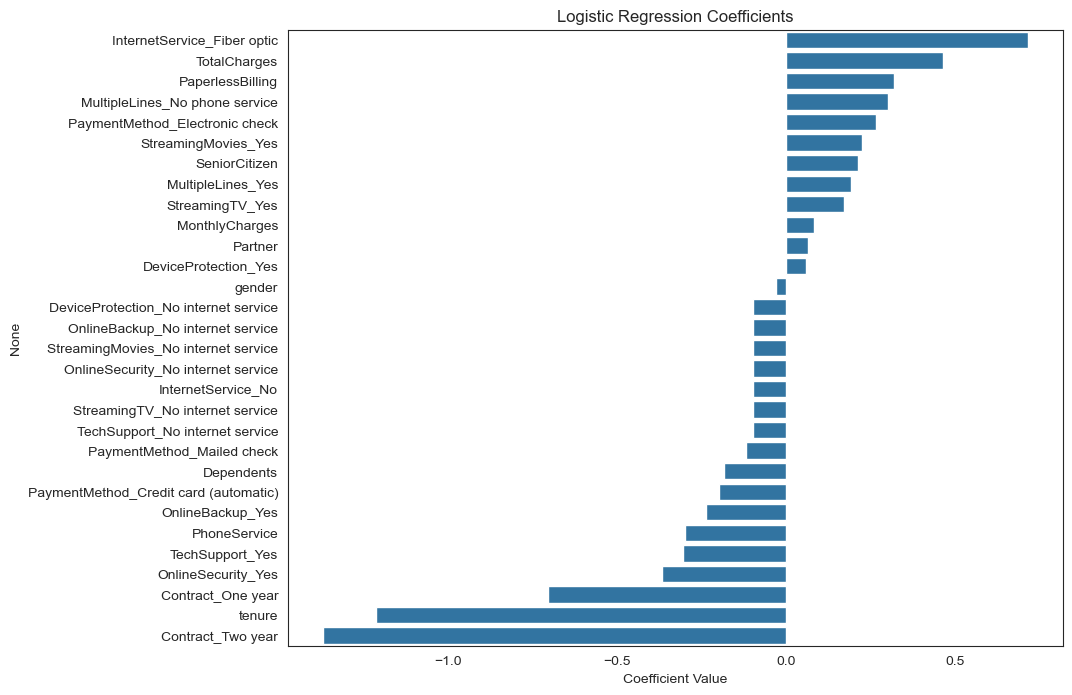

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Separate the target variable from the features
X = customer_df_one_hot_encoded.drop('Churn', axis=1)
y = customer_df_one_hot_encoded['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test_log = train_test_split(X, y, test_size=0.25, stratify=y)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test_log, y_pred_log)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
cm = print(confusion_matrix(y_test_log, y_pred_log))

# Evaluating the model
print(classification_report(y_test_log, y_pred_log))

# Analyzing the coefficients
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])

sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(sorted_coefficients)

# Assuming log_reg is your trained logistic regression model and X.columns are the feature names
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
# Set the style to 'white' to remove the grey background
sns.set_style("white")

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_coefficients['Coefficient'], y=sorted_coefficients.index)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')

# plt.ylabel('Features')
plt.show()


##### Random Forest

Random Forest Accuracy: 0.7995457126632595

Random Forest Confusion Matrix:
 [[1176  118]
 [ 235  232]]

Random Forest Classification Report:
               precision    recall  f1-score      support
0              0.833451  0.908810  0.869501  1294.000000
1              0.662857  0.496788  0.567931   467.000000
accuracy       0.799546  0.799546  0.799546     0.799546
macro avg      0.748154  0.702799  0.718716  1761.000000
weighted avg   0.788212  0.799546  0.789528  1761.000000

Feature Importances:
                                   Feature  Importance
2                            TotalCharges    0.185911
0                                  tenure    0.171532
1                          MonthlyCharges    0.151310
26                      Contract_Two year    0.046529
11            InternetService_Fiber optic    0.038848
28         PaymentMethod_Electronic check    0.037445
25                      Contract_One year    0.028104
3                                  gender    0.026613
14    

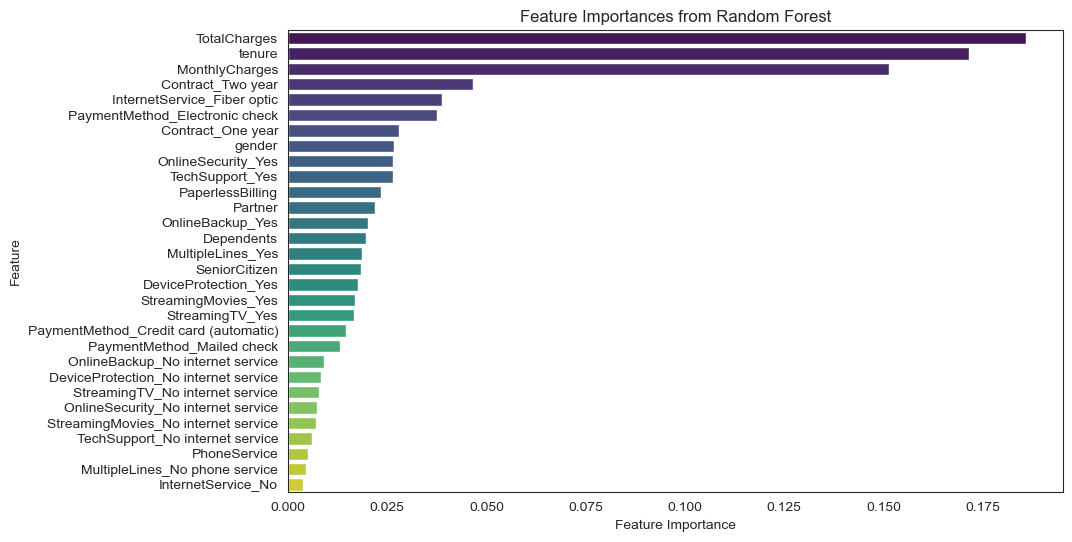

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming customer_df_one_hot_encoded is your preprocessed DataFrame
# Separate the target variable from the features
X = customer_df_one_hot_encoded.drop('Churn', axis=1)
y = customer_df_one_hot_encoded['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.25, stratify=y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced_subsample')

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

report_dict = classification_report(y_test_rf, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix_rf)
print("\nRandom Forest Classification Report:\n", report_df)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Transform the feature importances into a readable format
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:\n", features_df)



# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a barplot showing the feature importances
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')

# Set the labels and title
plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')

# Show the plot
plt.show()

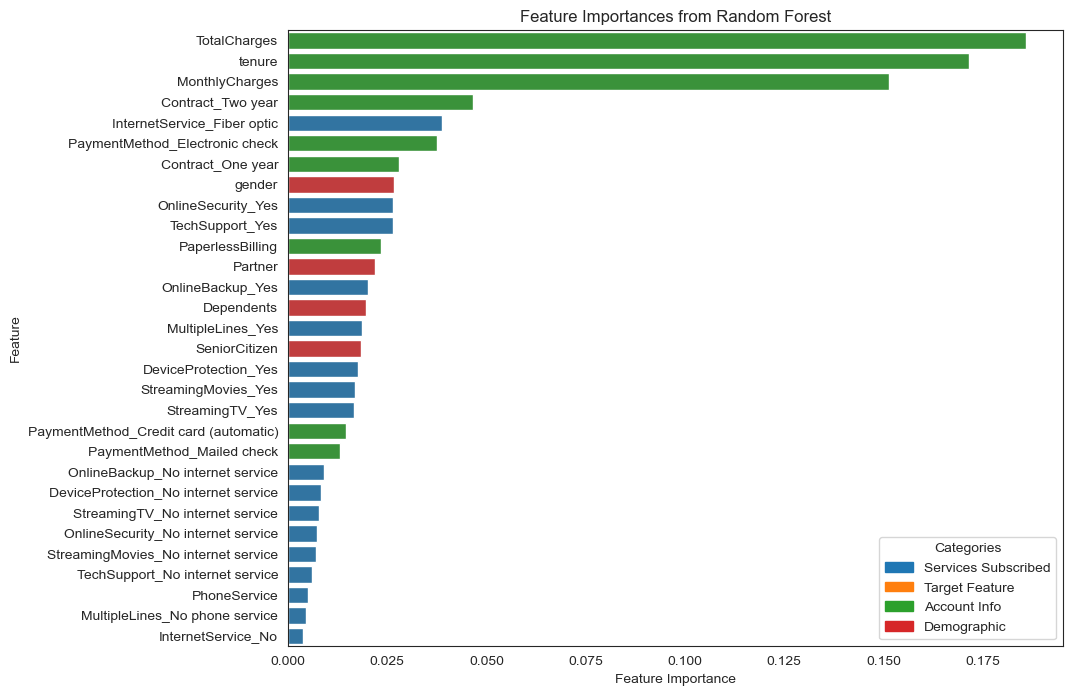

In [272]:
feature_to_category = {
    'customerID': 'Account Info',
    'gender': 'Demographic',
    'SeniorCitizen': 'Demographic',
    'Partner': 'Demographic',
    'Dependents': 'Demographic',
    'tenure': 'Account Info',
    'PhoneService': 'Services Subscribed',
    'MultipleLines': 'Services Subscribed',
    'InternetService': 'Services Subscribed',
    'OnlineSecurity': 'Services Subscribed',
    'OnlineBackup': 'Services Subscribed',
    'DeviceProtection': 'Services Subscribed',
    'TechSupport': 'Services Subscribed',
    'StreamingTV': 'Services Subscribed',
    'StreamingMovies': 'Services Subscribed',
    'Contract': 'Account Info',
    'PaperlessBilling': 'Account Info',
    'PaymentMethod': 'Account Info',
    'MonthlyCharges': 'Account Info',
    'TotalCharges': 'Account Info',
    'Churn': 'Target Feature',
    # One-hot encoded features
    'Contract_Two year': 'Account Info',
    'Contract_One year': 'Account Info',
    'InternetService_Fiber optic': 'Services Subscribed',
    'InternetService_No': 'Services Subscribed',
    'PaymentMethod_Electronic check': 'Payment Method',
    'PaymentMethod_Mailed check': 'Payment Method',
    'PaymentMethod_Credit card (automatic)': 'Payment Method',
    'OnlineSecurity_Yes': 'Services Subscribed',
    'OnlineBackup_Yes': 'Services Subscribed',
    'DeviceProtection_Yes': 'Services Subscribed',
    'TechSupport_Yes': 'Services Subscribed',
    'StreamingTV_Yes': 'Services Subscribed',
    'StreamingTV_No internet service': 'Services Subscribed',
    'StreamingMovies_Yes': 'Services Subscribed',
    'StreamingMovies_No internet service': 'Services Subscribed',
    'TechSupport_No internet service': 'Services Subscribed',
    'OnlineBackup_No internet service': 'Services Subscribed',
    'DeviceProtection_No internet service': 'Services Subscribed',
    'OnlineSecurity_No internet service': 'Services Subscribed',
    'MultipleLines_No phone service': 'Services Subscribed',
    'MultipleLines_Yes': 'Services Subscribed',
}

# Expand the mapping to include one-hot encoded features
# This assumes that the one-hot encoded features have an underscore '_' in them
for feature in features_df['Feature']:
    base_feature = feature.split('_')[0]
    if base_feature in feature_to_category:
        feature_to_category[feature] = feature_to_category[base_feature]

# Choose a Seaborn color palette with more distinct colors
palette = sns.color_palette("tab10")  # 'tab10' is an example of a palette with 10 distinct colors

# Ensure there are enough colors for your categories
unique_categories = list(set(feature_to_category.values()))
while len(palette) < len(unique_categories):
    palette.extend(sns.color_palette("tab10"))

# Assign each category a color from the palette
category_color_mapping = {category: color for category, color in zip(unique_categories, palette)}

# Map each feature to its corresponding color
features_df['Color'] = features_df['Feature'].apply(lambda feature: category_color_mapping[feature_to_category[feature]])

# Create the bar plot with the assigned colors
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.sort_values(by='Importance', ascending=False),
            palette=features_df['Color'].tolist())

# Set the labels and title
plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')

# Create legend patches
legend_patches = [mpatches.Patch(color=category_color_mapping[category], label=category) for category in unique_categories]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Categories', loc='lower right')

# Show the plot
plt.show()

Undersampling Approach

In [273]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Continue with your train-test split and model training
X_train_resampled, X_test_resampled, y_train_resampled, y_test_undersample = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf_undersample = rf_classifier.predict(X_test_resampled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_undersample, y_pred_rf_undersample)
confusion_matrix_rf = confusion_matrix(y_test_undersample, y_pred_rf_undersample)

report_dict = classification_report(y_test_undersample, y_pred_rf_undersample, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix_rf)
print("\nRandom Forest Classification Report:\n", report_df)


Random Forest Accuracy: 0.7718360071301248

Random Forest Confusion Matrix:
 [[421 140]
 [116 445]]

Random Forest Classification Report:
               precision    recall  f1-score      support
0              0.783985  0.750446  0.766849   561.000000
1              0.760684  0.793226  0.776614   561.000000
accuracy       0.771836  0.771836  0.771836     0.771836
macro avg      0.772334  0.771836  0.771732  1122.000000
weighted avg   0.772334  0.771836  0.771732  1122.000000


SMOTE Approach

In [274]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_rf_smote = train_test_split(X_resampled, y_resampled, test_size=0.25, stratify=y_resampled)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf_smote = rf_classifier.predict(X_test_resampled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf_smote, y_pred_rf_smote)
confusion_matrix_rf = confusion_matrix(y_test_rf_smote, y_pred_rf_smote)
report_rf = classification_report(y_test_rf_smote, y_pred_rf_smote)

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix_rf)
print("\nRandom Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.8438345574023965

Random Forest Confusion Matrix:
 [[1068  225]
 [ 179 1115]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1293
           1       0.83      0.86      0.85      1294

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



To properly implement SMOTE while avoiding data leakage, you should first split your dataset into training and testing sets and then apply SMOTE only to the training set. This approach ensures that the synthetic samples created by SMOTE are only used in the training phase and do not influence the testing set, thereby providing a fair evaluation of your model. Here's how you can do it:

Key Points:

- Split Data First: Splitting the dataset before applying SMOTE prevents the synthetic samples from leaking into the testing set, ensuring that the test data remains untouched and is a true representation of real-world data.
- Apply SMOTE to Training Data Only: SMOTE is applied only to the training data (X_train, y_train). This step balances the training data, helping the model learn better from the minority class.
- Train and Evaluate on Different Sets: The model is trained on the resampled training set and then evaluated on the original test set. This helps to assess how well the model generalizes to unseen data.

In [275]:
# First, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Initialize SMOTE and apply it only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model with the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original (not resampled) test data
y_pred_rf_smote = rf_classifier.predict(X_test)

# Evaluate the model using the original test data
accuracy_rf = accuracy_score(y_test, y_pred_rf_smote)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf_smote)
report_rf = classification_report(y_test, y_pred_rf_smote, output_dict=True)

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix_rf)

Random Forest Accuracy: 0.7762634866553095

Random Forest Confusion Matrix:
 [[1069  225]
 [ 169  298]]


Combining Reports

In [296]:

# # Assume that y_true is your test labels and y_pred1, y_pred2, y_pred3 are the predicted labels from three different models
# y_true = [/* ... your test labels ... */]
# y_pred_rf_undersample = [/* ... predictions from model 1 (undersample) ... */]
# y_pred_rf_smote = [/* ... predictions from model 2 (SMOTE) ... */]
# y_pred_rf_smote_train_only = [/* ... predictions from model 3 (SMOTE train only) ... */]


# Generate classification reports 
report_log = classification_report(y_test_log, y_pred_log, output_dict=True)
report_rf = classification_report(y_test_rf, y_pred_rf, output_dict=True)
report_undersample = classification_report(y_test_undersample, y_pred_rf_undersample, output_dict=True)
# report_smote = classification_report(y_test_rf_smote, y_pred_rf_smote, output_dict=True)
report_smote_train_only = classification_report(y_test, y_pred_rf_smote, output_dict=True)

# # Convert each report to a DataFrame with appropriate model names
df1 = pd.DataFrame(report_log).transpose().assign(Model='Logistic Regression')
df1.reset_index(inplace=True)
df1.rename(columns={'index': 'Metric/Class'}, inplace=True)


df2 = pd.DataFrame(report_rf).transpose().assign(Model='Random Forest')
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Metric/Class'}, inplace=True)


df3 = pd.DataFrame(report_undersample).transpose().assign(Model='Random Forest with Undersampling')
df3.reset_index(inplace=True)
df3.rename(columns={'index': 'Metric/Class'}, inplace=True)


# # df4 = pd.DataFrame(report_smote).transpose().assign(Model='Random Forest with SMOTE')

df5 = pd.DataFrame(report_smote_train_only).transpose().assign(Model='Random Forest with SMOTE (Train Only)')
df5.reset_index(inplace=True)
df5.rename(columns={'index': 'Metric/Class'}, inplace=True)

# # # # Combine all the DataFrames
combined_df = pd.concat([df1, df2, df3, df5], axis=0, ignore_index=True)

# # # # Optionally, rename the 'index' column to something more descriptive
combined_df.rename(columns={'index': 'Metric'}, inplace=True)

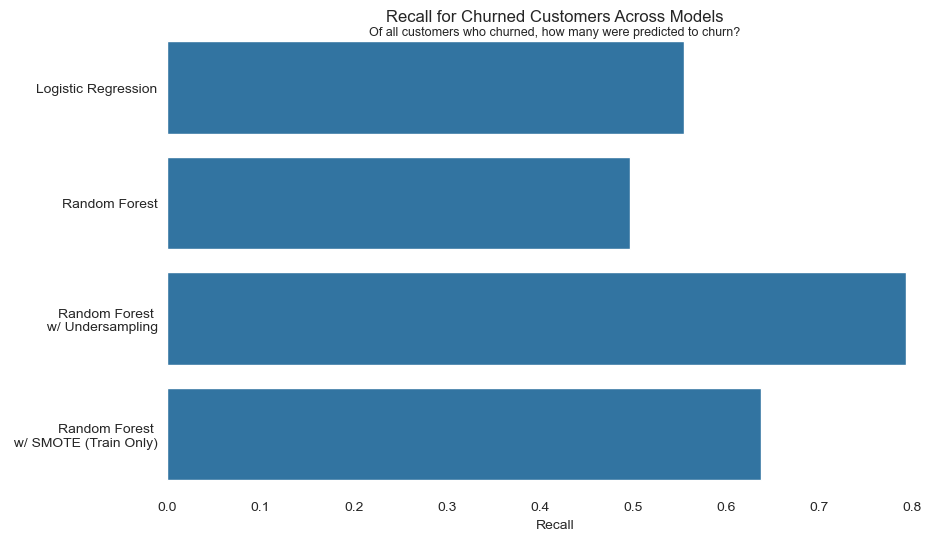

In [331]:
churned_df = combined_df[combined_df['Metric/Class'] == '1']

# Function to format model names
def format_model_name(name):
    return name.replace("with", "\n w/") if "with" in name else name


plt.figure(figsize=(10, 6))
sns.barplot(x='recall', y='Model', data=churned_df)
plt.title('Recall for Churned Customers Across Models')
plt.xlabel('Recall')
plt.ylabel('')

# Remove all spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Set custom y-axis labels
formatted_model_names = [format_model_name(model) for model in churned_df['Model']]
plt.yticks(ticks=range(len(formatted_model_names)), labels=formatted_model_names)

# Add subtitle and have it right below the title
plt.text(0.5, .995, 'Of all customers who churned, how many were predicted to churn?', 
         ha='center', va='center', transform=plt.gca().transAxes,  fontsize=9)

plt.grid(False)

plt.show()

Precision

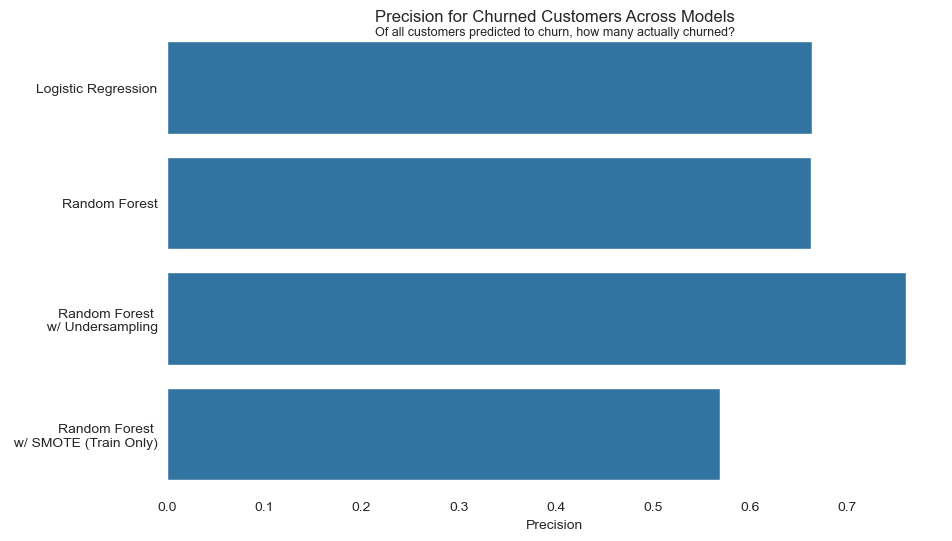

In [332]:
plt.figure(figsize=(10, 6))
sns.barplot(x='precision', y='Model', data=churned_df)
plt.title('Precision for Churned Customers Across Models')
plt.xlabel('Precision')
plt.ylabel('')

# Remove all spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Set custom y-axis labels
formatted_model_names = [format_model_name(model) for model in churned_df['Model']]
plt.yticks(ticks=range(len(formatted_model_names)), labels=formatted_model_names)

# Add subtitle and have it right below the title
plt.text(0.5, .995, 'Of all customers predicted to churn, how many actually churned?', 
         ha='center', va='center', transform=plt.gca().transAxes,  fontsize=9)

plt.grid(False)

plt.show()

Accuracy

In [334]:
churned_df

,Metric/Class,precision,recall,f1-score,support,Model
1,1,0.664103,0.554604,0.604434,467.0,Logistic Regression
6,1,0.662857,0.496788,0.567931,467.0,Random Forest
11,1,0.760684,0.793226,0.776614,561.0,Random Forest with Undersampling
16,1,0.569790,0.638116,0.602020,467.0,Random Forest with SMOTE (Train Only)


f1-score

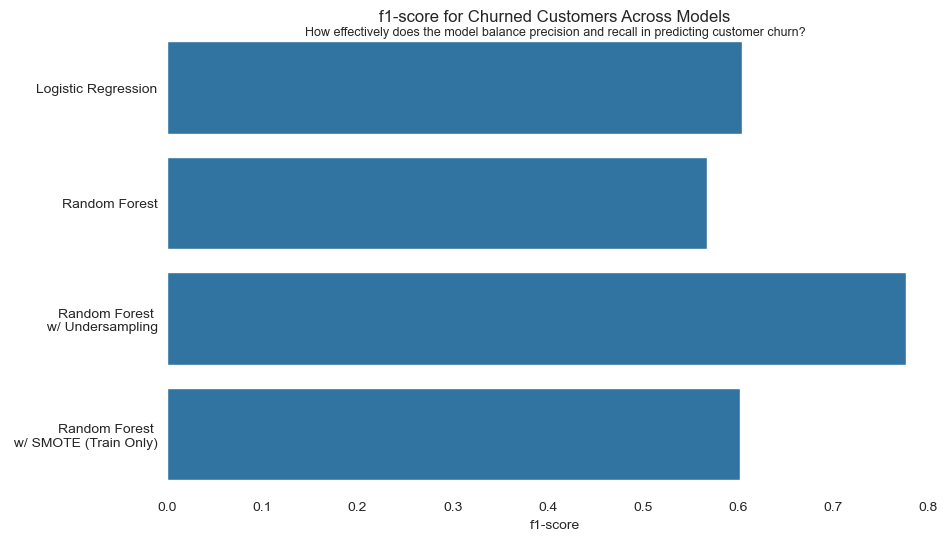

In [335]:
plt.figure(figsize=(10, 6))
sns.barplot(x='f1-score', y='Model', data=churned_df)
plt.title('f1-score for Churned Customers Across Models')
plt.xlabel('f1-score')
plt.ylabel('')

# Remove all spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Set custom y-axis labels
formatted_model_names = [format_model_name(model) for model in churned_df['Model']]
plt.yticks(ticks=range(len(formatted_model_names)), labels=formatted_model_names)

# Add subtitle and have it right below the title
plt.text(0.5, .995, 'How effectively does the model balance precision and recall in predicting customer churn?', 
         ha='center', va='center', transform=plt.gca().transAxes,  fontsize=9)

plt.grid(False)

plt.show()

support

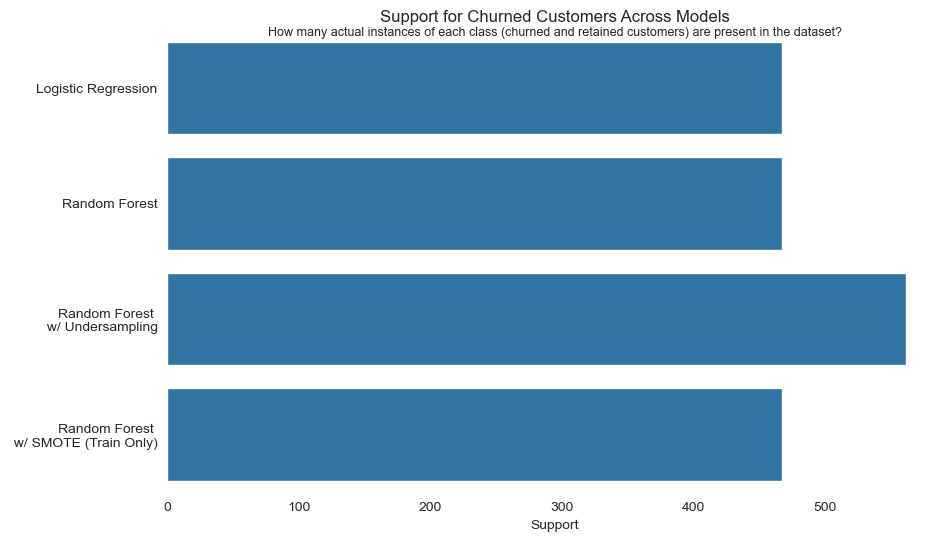

In [337]:
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='Model', data=churned_df)
plt.title('Support for Churned Customers Across Models')
plt.xlabel('Support')
plt.ylabel('')

# Remove all spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Set custom y-axis labels
formatted_model_names = [format_model_name(model) for model in churned_df['Model']]
plt.yticks(ticks=range(len(formatted_model_names)), labels=formatted_model_names)

# Add subtitle and have it right below the title
plt.text(0.5, .995, 'How many actual instances of each class (churned and retained customers) are present in the dataset?', 
         ha='center', va='center', transform=plt.gca().transAxes,  fontsize=9)

plt.grid(False)

plt.show()

In [ ]:
averages_df = combined_df[combined_df['Metric/Class'].isin(['macro avg', 'weighted avg'])]